In [ ]:
# Nice clean supervised learning setup


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from gaussian_kde import gaussian_kde
from utility import display_components, display_pca_data, weighted_kde

In [4]:
# del xgboost
xgb_dir = "C:\\Users\\Marios\\AppData\\Local\\conda\\conda\\envs\\BES_analysis\\Lib\\site-packages\\xgboost"
import sys, os
sys.path.append(xgb_dir)
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, cv, plot_tree

# First XGBoost model for Pima Indians dataset
import graphviz

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from boostaroota import BoostARoota

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from boruta import BorutaPy

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

import shap
shap.initjs()

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from xgboost_tuner.tuner import tune_xgb_params

ImportError: No module named 'xgboost'

In [11]:
# conda install -c anaconda py-xgboost
import xgboost as xgb

In [4]:
dataset_name = "W13_comb"

In [5]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
print("BES_Panel", BES_Panel.shape )

BES_Panel (68625, 5150)
Wall time: 3.17 s


In [7]:
####

# BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
# print("BES_numeric",  BES_numeric.shape )
try:
    var_type    = pd.read_hdf( data_subfolder + "var_type.hdf", encoding=encoding)
except:
    var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
    var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

# BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
# print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

# BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
# print("BES_reduced_with_na", BES_reduced_with_na.shape )

# fname = data_subfolder + "new_old_col_names.pkl"
# with open(fname, "rb") as f:
#     new_old_col_names = pickle.load(f) 

var_type (5173, 12)
BES_reduced (68625, 2572)


In [149]:
fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

In [ ]:
# Reduction process

# median imputation

# many_cat_drop_list

# high_corr_drop_list


In [98]:
## augment dataset
# pan_dataset_values
# census data
# 

pan_dataset_values = pd.read_csv( BES_small_data_files + "pan_dataset_values.csv", encoding=encoding)    

In [8]:
# # http://www.britishelectionstudy.com/data-object/2017-bes-constituency-results-with-census-and-candidate-data/
# BES_census_data = pd.read_stata( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
# print("BES_census_data", BES_census_data.shape )

# pano_var_dict = {int(x.replace("panoW","")):x for x in BES_Panel.columns if "pano" in x}
# sorted_pano_vars = [ pano_var_dict[x] for x in sorted( pano_var_dict.keys() ) ]

# BES_reduced_with_na["pano"] = BES_Panel[sorted_pano_vars].bfill(axis=1).iloc[:, 0]


# # len()
# census_vars = [x for x in BES_census_data.columns if re.match('c\w',x) ]
# census_vars.append("leaveHanretty")
# census_vars.append("remainHanretty")
# census_vars.append("pano")
# # ConstituencyType
# BES_reduced_with_na = pd.merge(BES_reduced_with_na, BES_census_data[census_vars], how = 'left', on = 'pano')


BES_census_data (632, 308)


NameError: name 'BES_reduced_with_na' is not defined

In [10]:
def get_base(im_var, waves=None, noNans = False):

    if waves:
        wave_list = waves
    else:
        wave_list = [x.replace(im_var,"") for x in BES_Panel.columns if re.match(im_var+"W\d+$",  x)]
        
    immig_vars = [im_var+x for x in wave_list]
    if noNans:
        all_in_dataset = BES_Panel[immig_vars].notnull().all(axis=1)

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars][all_in_dataset]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
    else:
        all_in_dataset = BES_Panel[immig_vars].isnull()
        
        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
        
        BES_immig[all_in_dataset] = np.nan
        all_in_dataset = ~all_in_dataset
        
        
    return BES_immig, all_in_dataset

imvar_list = ["immigEcon","immigCultural", "immigSelf",
             "immigrationLevel", "immigContributeTake",
             "immigrantsWelfareState", "controlImmig",
             "effectsEUImmigration", "euPriorityBalance",
             "changeImmig", "changeImmigLab",
             "govtHandleImmig", "labHandleImmig",
             "asylumMore", "euMore", "noneuMore", "studentsMore", "familiesMore",
             "ukCoopMovement"]

# im_var = "immigCultural"

num = 0
for im_var in imvar_list:
    immig, mask = get_base(im_var,noNans = False)
    immig.columns = ["Delta_"+x for x in immig.columns]
    if num ==0:
        immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
    else:
        immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1

In [11]:
# add both together
im_var = "immigEcon"
immig_econ,mask = get_base(im_var,waves=["W8"],noNans = False)
mask = (immig_econ < immig_econ.median())[im_var+"W8"]
mask = (mask & immigDiff["Delta_immigSelfW10"].notnull() & immigDiff["Delta_controlImmigW9"].notnull())

BES_immigEcon = pd.concat( [BES_reduced[mask],immigDiff[[x for x in immigDiff.columns if "W10" in x]][mask]], axis=1)
BES_immigEcon = BES_immigEcon.drop(["Delta_changeImmigLabW10"],axis=1, errors='ignore')
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigEcon" in x], axis=1)
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigCultural" in x], axis=1)
BES_immigEcon["Delta_controlImmigW9"] = immigDiff["Delta_controlImmigW9"][mask]
# BES_immigEcon = BES_immigEcon[var_list]


target = immigDiff["Delta_immigEconW10"][mask] + immigDiff["Delta_immigCulturalW10"][mask]
new_target = round(6*target).apply(lambda x: min(x,10))
new_target = new_target.astype('category')
new_target

In [18]:
X = BES_immigEcon
y = new_target

In [22]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet


In [23]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42, stratify = y)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline , parameters , cv = 3)

# Fit to the training set
gm_cv.fit( X_train, y_train )

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.11529615039177865


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [25]:
[x for x in BES_Panel.columns if "subject" in x.lower()]

['subjectHEW1W2W3', 'subjectHECurrentW1W2W3']

In [37]:
gm_cv.best_estimator_

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
      l1_ratio=0.20689655172413793, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False))])

In [64]:
coef_df = pd.DataFrame(gm_cv.best_estimator_.named_steps['elasticnet'].coef_, index = X.columns)
coef_df[0].replace(0, np.nan).dropna().sort_values()

ukCoopMovementW10__Bad for Britain                     -0.091384
Delta_ukCoopMovementW10                                -0.043338
Delta_immigrantsWelfareStateW10                        -0.029937
changeImmigW10__Getting a lot higher                   -0.029933
euPriorityBalanceW12__Control immigration              -0.026151
noChanceCoalitionGrnW12_Yes                            -0.026072
achieveReduceImmigUKIPW12_Yes                          -0.022806
likeFarageW10__Strongly like                           -0.021992
immigrantsWelfareStateW11__Strongly agree              -0.019252
ptvUKIPW11__Very likely                                -0.019077
britishnessW7__Very strongly British                   -0.015730
certaintyEULDW8__Very certain                          -0.014967
euPriorityBalanceW13__Control immigration              -0.013956
likeFarageW5__Strongly like                            -0.009517
ptvUKIPW10__Very likely                                -0.006527
immigrantsWelfareStateW10

In [66]:
## set up xgboost with missing values!
BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )




BES_reduced_with_na (68625, 2572)


In [103]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [196]:
def get_base(im_var, waves=None, noNans = False):
    skip = False
    if waves:
        wave_list = waves
    else:
        wave_list = [x.replace(im_var,"") for x in BES_Panel.columns if re.match(im_var+"W\d+$",  x)]
#     if not wave_list:
#         skip = True
#         return None, None, skip
#     else:
    immig_vars = [im_var+x for x in wave_list]
    if any([(x not in BES_Panel.columns) for x in immig_vars]):
        skip = True
        return None, None, skip, wave_list
    if noNans:
        all_in_dataset = BES_Panel[immig_vars].notnull().all(axis=1)

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars][all_in_dataset]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
    else:
        all_in_dataset = BES_Panel[immig_vars].isnull()

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range

        BES_immig[all_in_dataset] = np.nan
        all_in_dataset = ~all_in_dataset


    return BES_immig, all_in_dataset, skip, wave_list

In [73]:
imvar_list = ["immigEcon","immigCultural", "immigSelf",
             "immigrationLevel", "immigContributeTake",
             "immigrantsWelfareState", "controlImmig",
             "effectsEUImmigration", "euPriorityBalance",
             "changeImmig", "changeImmigLab",
             "govtHandleImmig", "labHandleImmig",
             "asylumMore", "euMore", "noneuMore", "studentsMore", "familiesMore",
              
             "ukCoopMovement","ukCoopTrade","ukCoopWorkers","ukCoopCAP","ukCoopEuro",
             "trustMPs", "polAttention", "discussPolDays",
             "benefitsToMigrants",
             "europeanness","englishness","britishness",
             "populism1","populism2","populism4","populism5","populism6",
             "EUIntegrationSelf", "harkBack", "euLeaveBigBusiness",
             "coalitionInTune", "happyEULeave", "overseasAid",
             "euLeaveScotIndep","effectsEUTerror","effectsEUTrade","effectsEUUnemployment",
             "effectsEUWorkers","effectsEUEcon","effectsEUFinance","effectsEUNHS",
             "certaintyUKLeave","certaintyUKRemain",
             "satDemUK", "satDemEU", "satDemEng",
             "prefTradeoff","beliefTradeoff",
             "euRefDoOver","expectAccess","handleEUNegotiate"              
             
             ]

In [83]:
num = 0
for im_var in imvar_list:
    print(im_var)
    #wave_list = ['W1', 'W2', 'W3', 'W4', 'W7', 'W8', 'W10', 'W11', 'W13']
    wave_list = []
    immig, mask, skip, wave_list = get_base(im_var,waves = wave_list,noNans = False)
    prev_wave_list = ["W0"]
    prev_wave_list.extend(wave_list)
    prev_wave_dict = {immig.columns[pos]:prev_wave_list[pos] for pos in range(0,len(immig.columns)) }
    if not skip:
        immig.columns = ["("+prev_wave_dict[x]+"->)"+x for x in immig.columns]
        if num ==0:
            immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
        else:
            immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1
    
null_columns = immigDiff.columns[immigDiff.isnull().all()]
if null_columns.any():
    immigDiff = immigDiff.drop( null_columns[0] , axis=1, errors= 'ignore')

immigEcon
immigCultural
immigSelf
immigrationLevel
immigContributeTake
immigrantsWelfareState
controlImmig
effectsEUImmigration
euPriorityBalance
changeImmig
changeImmigLab
govtHandleImmig
labHandleImmig
asylumMore
euMore
noneuMore
studentsMore
familiesMore
ukCoopMovement
ukCoopTrade
ukCoopWorkers
ukCoopCAP
ukCoopEuro
trustMPs
polAttention
discussPolDays
benefitsToMigrants
europeanness
englishness
britishness
populism1
populism2
populism4
populism5
populism6
EUIntegrationSelf
harkBack
euLeaveBigBusiness
coalitionInTune
happyEULeave
overseasAid
euLeaveScotIndep
effectsEUTerror
effectsEUTrade
effectsEUUnemployment
effectsEUWorkers
effectsEUEcon
effectsEUFinance
effectsEUNHS
certaintyUKLeave
certaintyUKRemain
satDemUK
satDemEU
satDemEng
prefTradeoff
beliefTradeoff
euRefDoOver
expectAccess
handleEUNegotiate


In [ ]:
# takes a while!
ec_var_list = [x for x in BES_reduced_with_na.columns if "immigEcon" in x] 
# [x.replace("Econ","Cultural") for x in ec_var_list]
for ec_var in ec_var_list:
    cult_var = ec_var.replace("Econ","Cultural").replace("Good for economy","Enriches cultural life")
    merg_var = ec_var.replace("Econ","Cult_plus_Ec").replace("Good for economy","Positive")
    print(ec_var,cult_var,merg_var)
    BES_reduced_with_na[merg_var] = BES_reduced_with_na[[ec_var,cult_var]].mean(axis=1)

In [93]:
ec_var_list = [x for x in immigDiff.columns if re.match("\(W\d+->\)immigEcon",x)] 
# [x.replace("Econ","Cultural") for x in ec_var_list]
for ec_var in ec_var_list:
    cult_var = ec_var.replace("Econ","Cultural")
    merg_var = ec_var.replace("Econ","Cult_plus_Ec")
    immigDiff[merg_var] = immigDiff[[ec_var,cult_var]].mean(axis=1)

In [94]:
var_stub = "immigCult_plus_Ec"
var_list = [x for x in immigDiff.columns if var_stub in x]
var_stub_list = ["immigCultural","immigEcon","immigCult_plus_Ec"]
base_list = [x for x in BES_reduced_with_na.columns if var_stub in x][0:len(var_list)]
var_list

['(W1->)immigCult_plus_EcW2',
 '(W2->)immigCult_plus_EcW3',
 '(W3->)immigCult_plus_EcW4',
 '(W4->)immigCult_plus_EcW7',
 '(W7->)immigCult_plus_EcW8',
 '(W8->)immigCult_plus_EcW10',
 '(W10->)immigCult_plus_EcW11',
 '(W11->)immigCult_plus_EcW13']

In [100]:
num_to_wave = {x:"W"+str(x) for x in range(1,14)}
num_to_weight = { y:[x for x in BES_Panel.columns.sort_values(ascending=False) if re.match("wt_(new|full)_W"+str(y)+"$",x)][0] for y in range(1,14) }

(W1->)immigCult_plus_EcW2 2
missing vals in sample weights: 8
[0]	validation_0-rmse:0.462875
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.446842
[2]	validation_0-rmse:0.431379
[3]	validation_0-rmse:0.416728
[4]	validation_0-rmse:0.402798
[5]	validation_0-rmse:0.389415
[6]	validation_0-rmse:0.376719
[7]	validation_0-rmse:0.364749
[8]	validation_0-rmse:0.35318
[9]	validation_0-rmse:0.342221
[10]	validation_0-rmse:0.331749
[11]	validation_0-rmse:0.321726
[12]	validation_0-rmse:0.31224
[13]	validation_0-rmse:0.303269
[14]	validation_0-rmse:0.294704
[15]	validation_0-rmse:0.286667
[16]	validation_0-rmse:0.279057
[17]	validation_0-rmse:0.271707
[18]	validation_0-rmse:0.264885
[19]	validation_0-rmse:0.25839
MSE: 0.07, MAE: 0.23, EV: 0.06, R2: -1.29


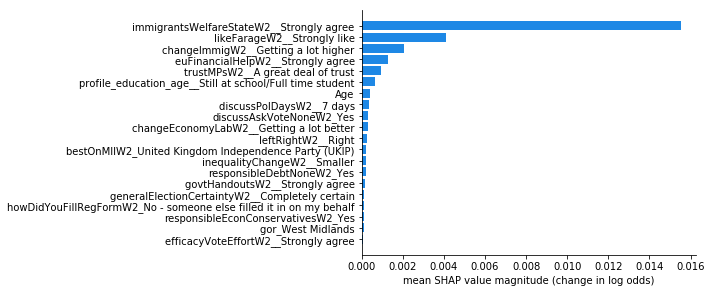

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


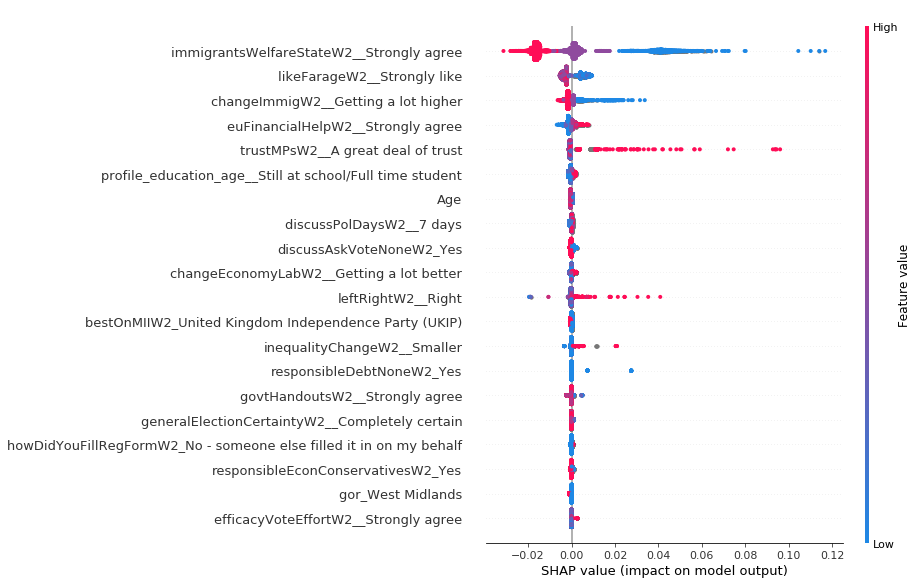

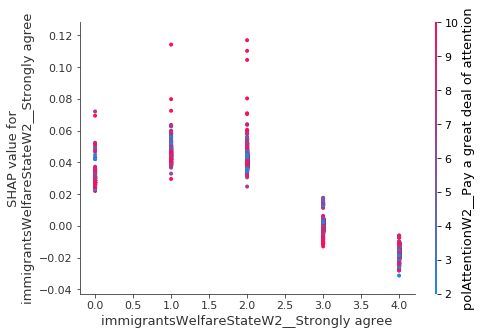

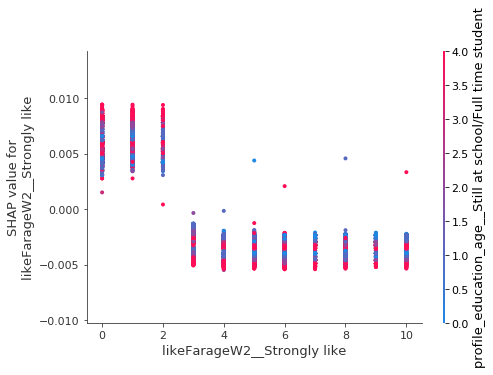

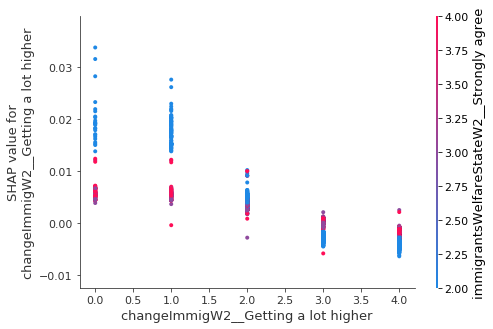

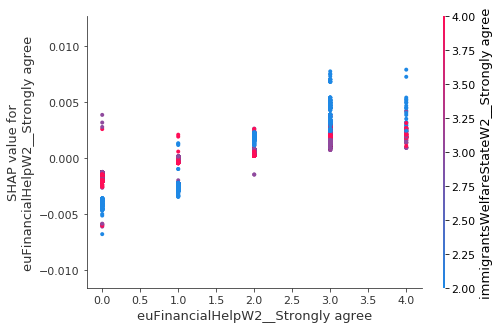

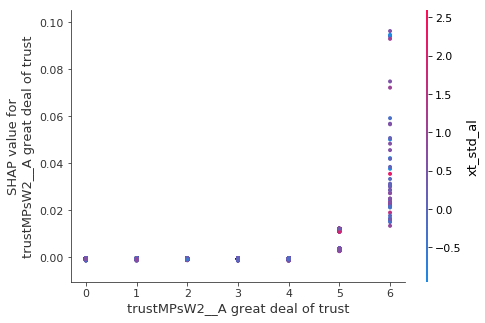

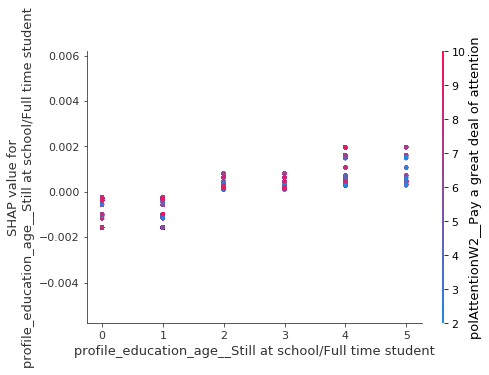

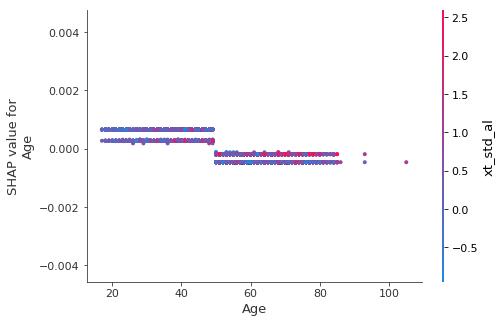

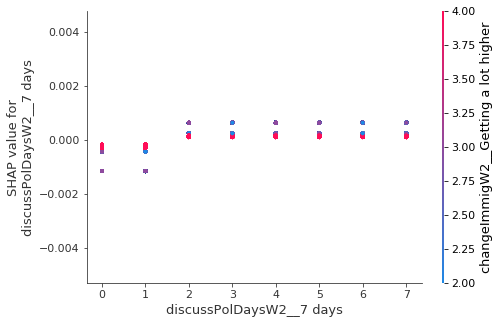

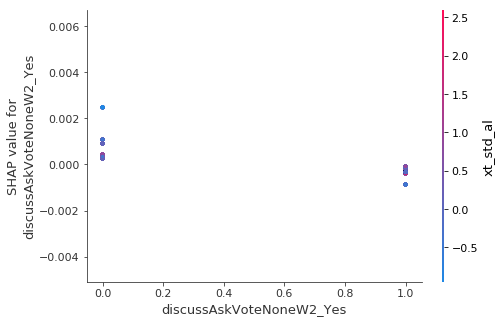

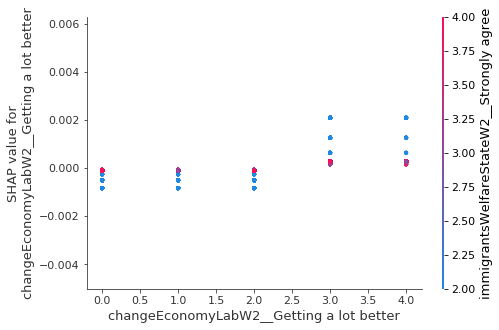

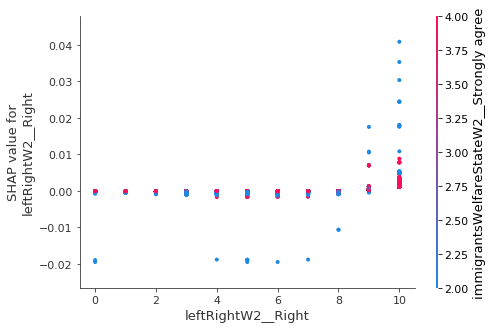

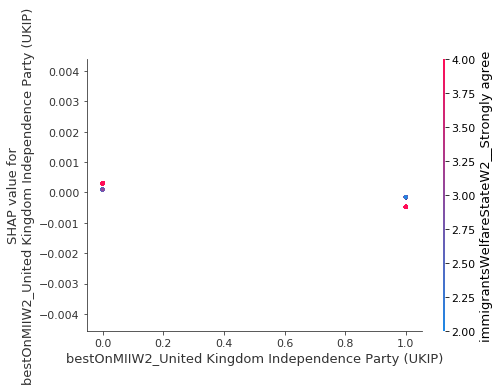

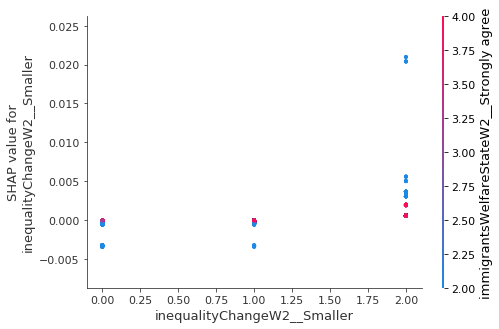

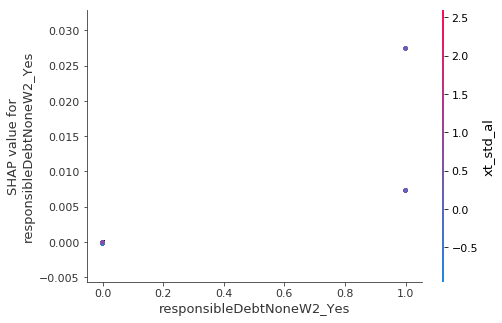

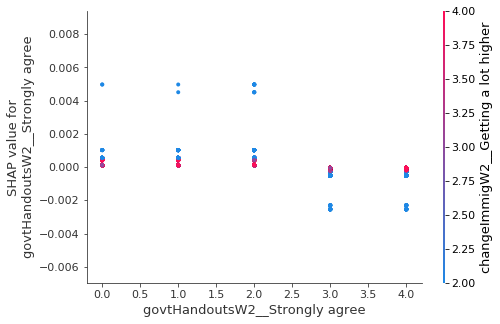

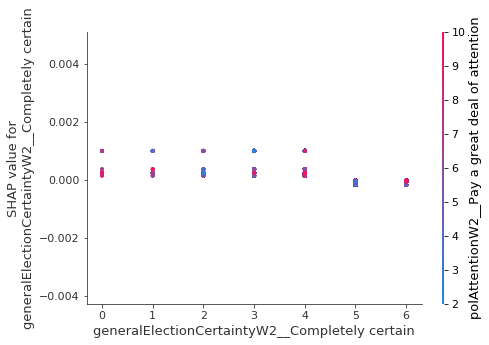

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


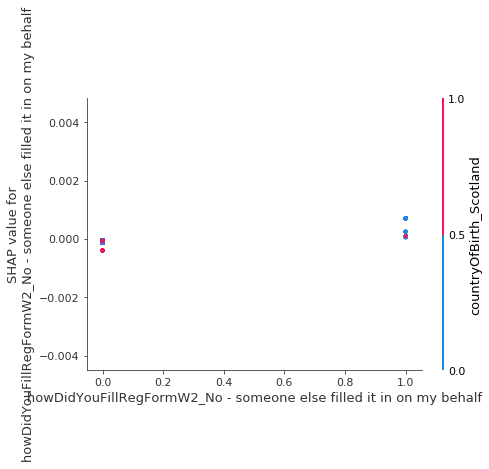

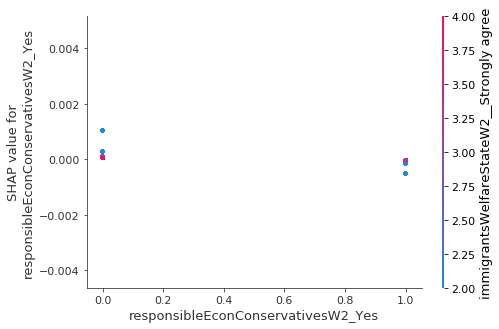

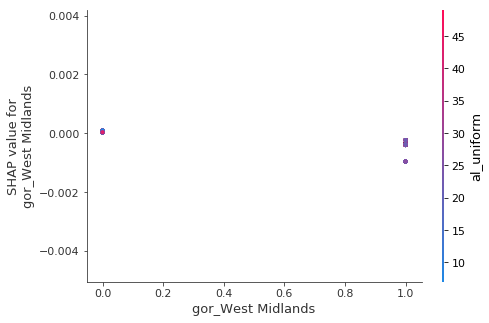

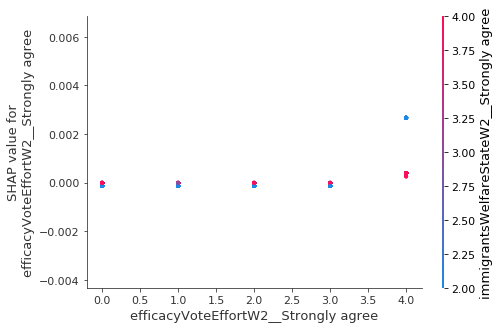

(W2->)immigCult_plus_EcW3 3
missing vals in sample weights: 0
[0]	validation_0-rmse:0.503796
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.485579
[2]	validation_0-rmse:0.468237
[3]	validation_0-rmse:0.451711
[4]	validation_0-rmse:0.435887
[5]	validation_0-rmse:0.420762
[6]	validation_0-rmse:0.406284
[7]	validation_0-rmse:0.392445
[8]	validation_0-rmse:0.379281
[9]	validation_0-rmse:0.366769
[10]	validation_0-rmse:0.354815
[11]	validation_0-rmse:0.343414
[12]	validation_0-rmse:0.332553
[13]	validation_0-rmse:0.322264
[14]	validation_0-rmse:0.312527
[15]	validation_0-rmse:0.30321
[16]	validation_0-rmse:0.294367
[17]	validation_0-rmse:0.285945
[18]	validation_0-rmse:0.27801
[19]	validation_0-rmse:0.270446
MSE: 0.07, MAE: 0.24, EV: 0.03, R2: -1.79


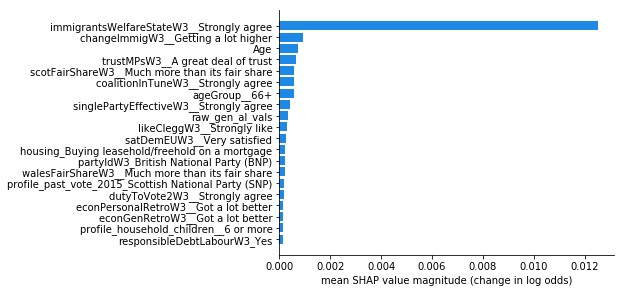

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


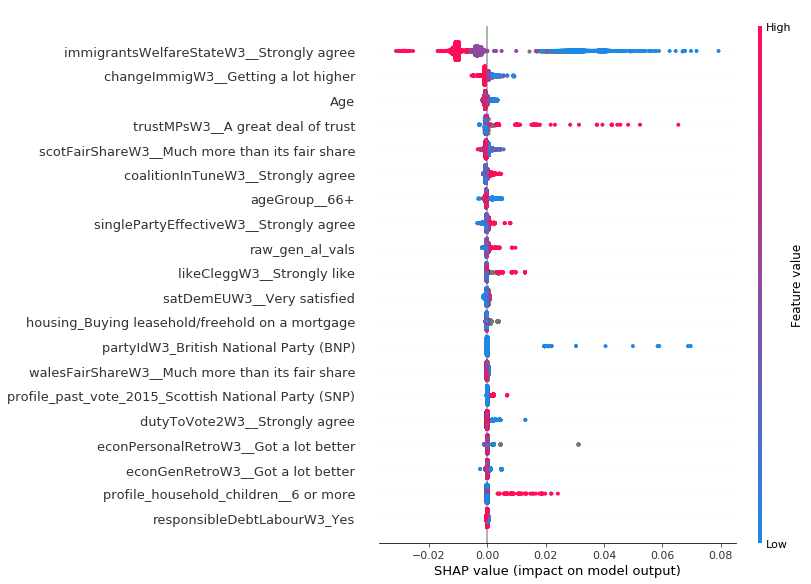

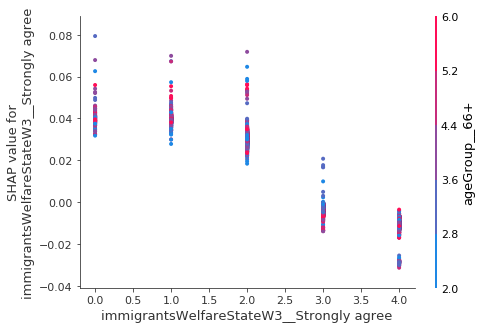

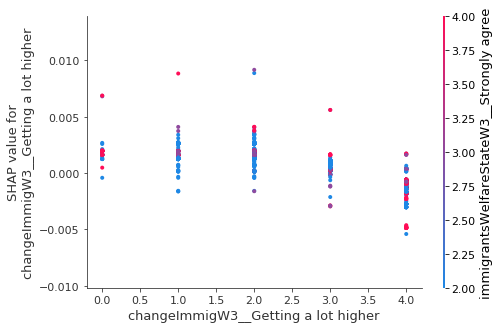

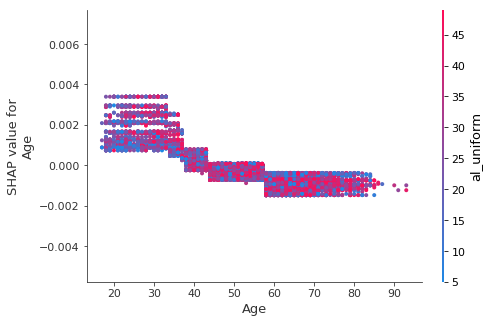

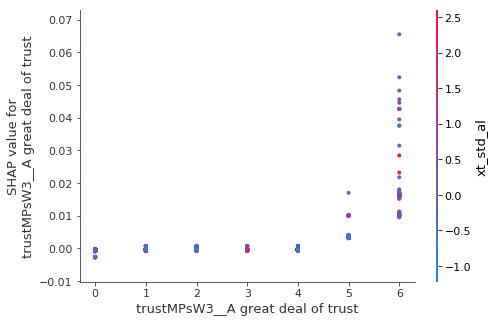

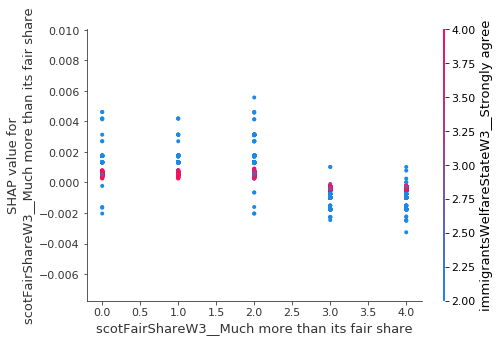

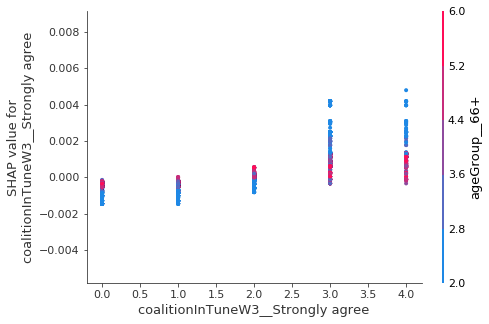

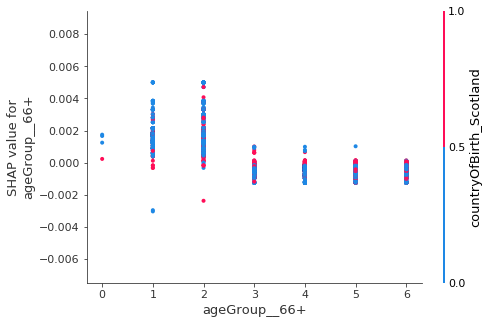

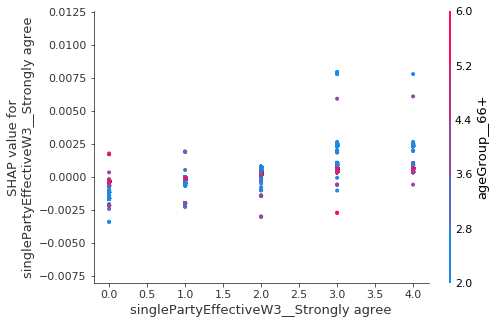

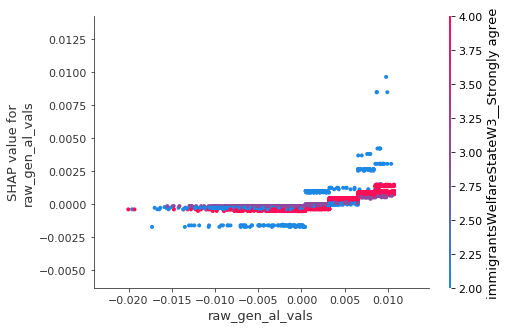

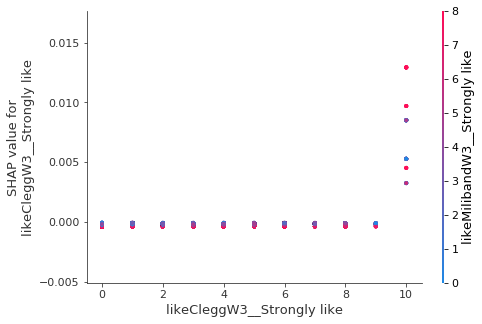

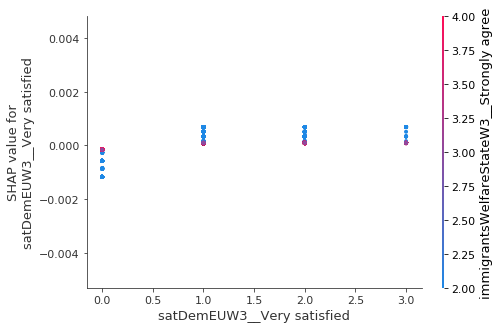

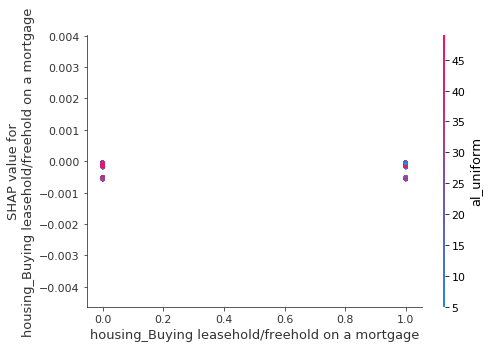

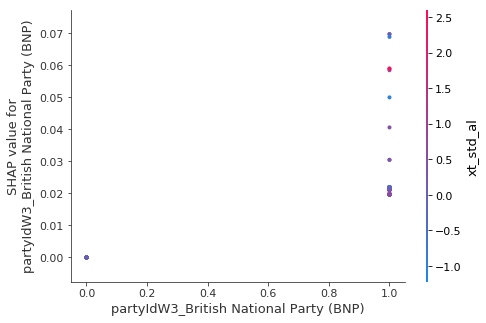

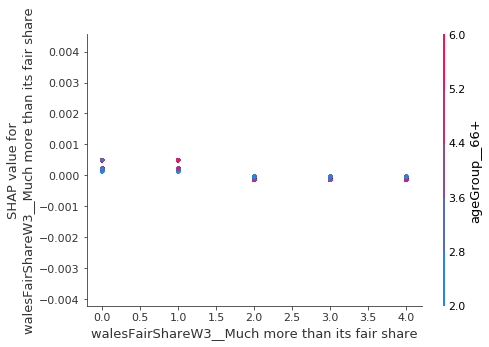

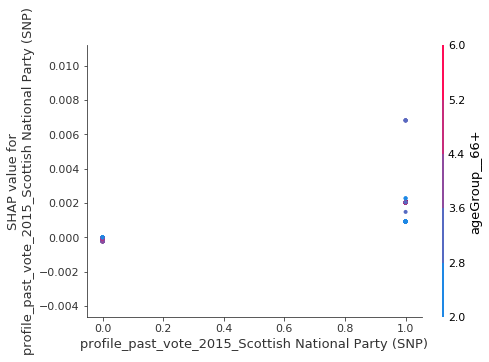

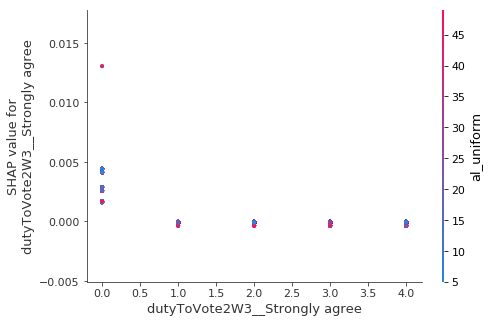

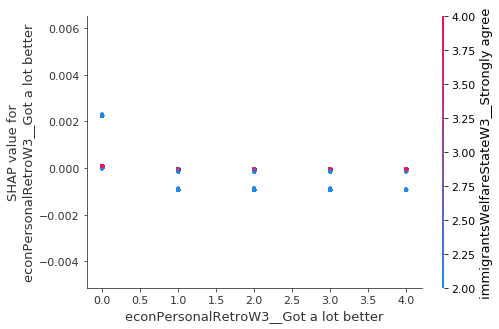

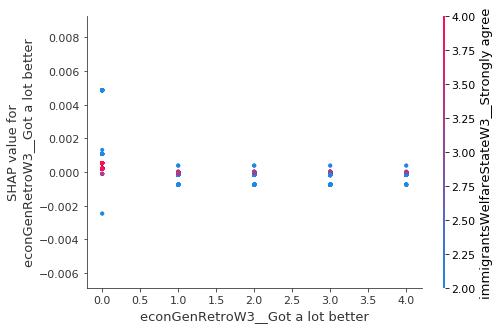

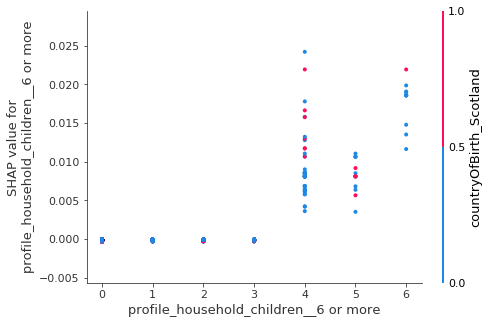

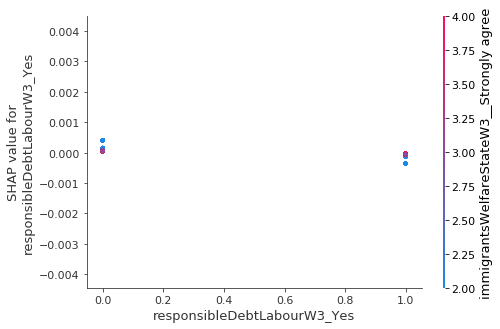

(W3->)immigCult_plus_EcW4 4
missing vals in sample weights: 25
[0]	validation_0-rmse:0.427177
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.41274
[2]	validation_0-rmse:0.399013
[3]	validation_0-rmse:0.386001
[4]	validation_0-rmse:0.373528
[5]	validation_0-rmse:0.36156
[6]	validation_0-rmse:0.350199
[7]	validation_0-rmse:0.339389
[8]	validation_0-rmse:0.329183
[9]	validation_0-rmse:0.319426
[10]	validation_0-rmse:0.310178
[11]	validation_0-rmse:0.301401
[12]	validation_0-rmse:0.292939
[13]	validation_0-rmse:0.285069
[14]	validation_0-rmse:0.277536
[15]	validation_0-rmse:0.270461
[16]	validation_0-rmse:0.263732
[17]	validation_0-rmse:0.257435
[18]	validation_0-rmse:0.251498
[19]	validation_0-rmse:0.245753
MSE: 0.06, MAE: 0.21, EV: 0.06, R2: -1.06


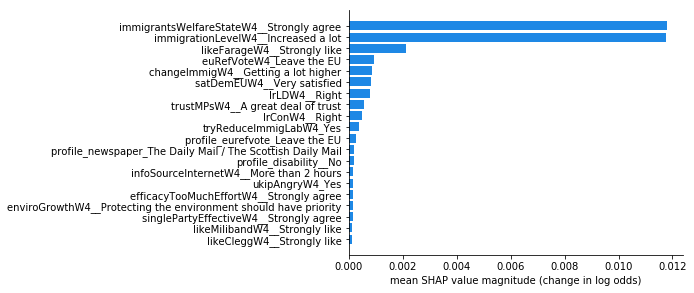

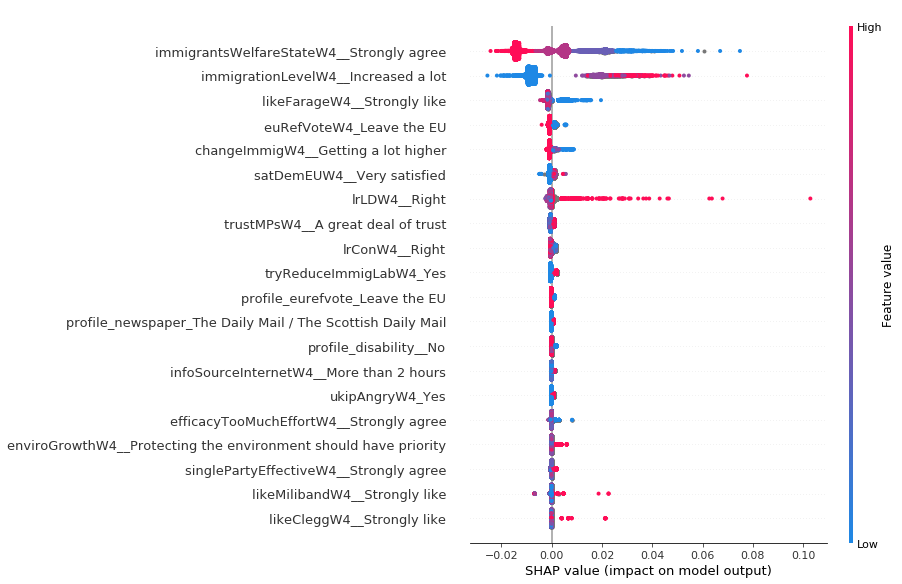

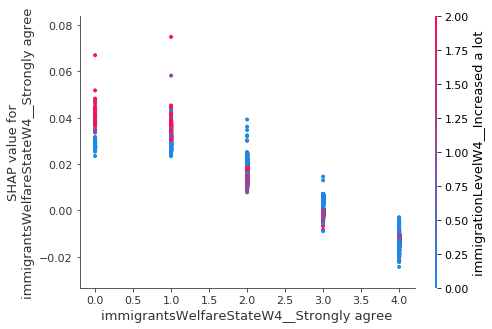

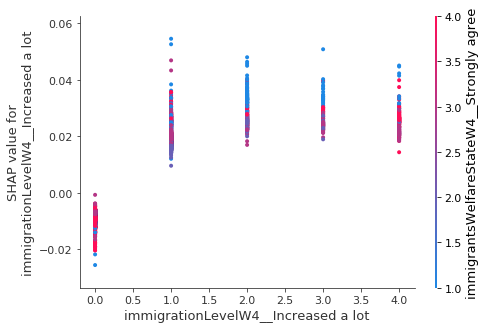

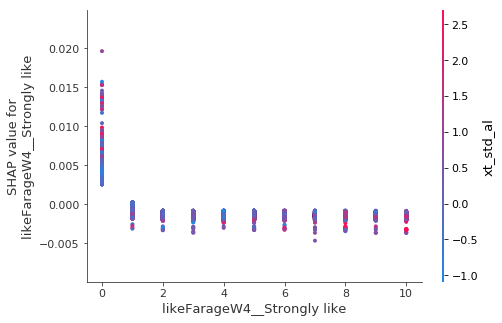

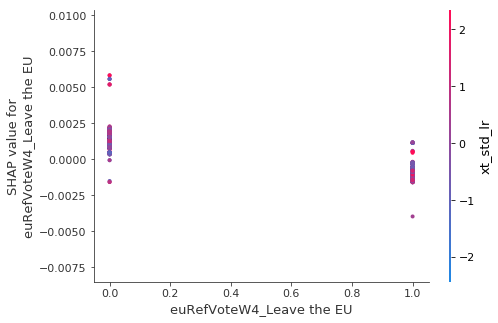

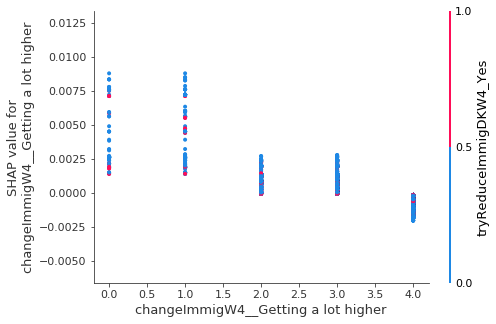

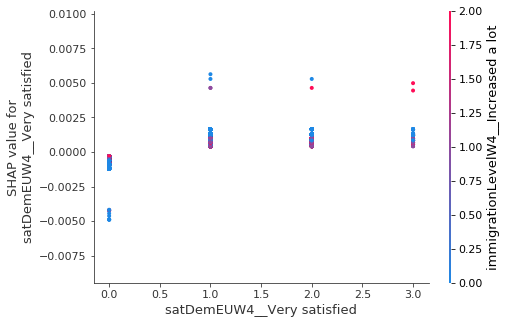

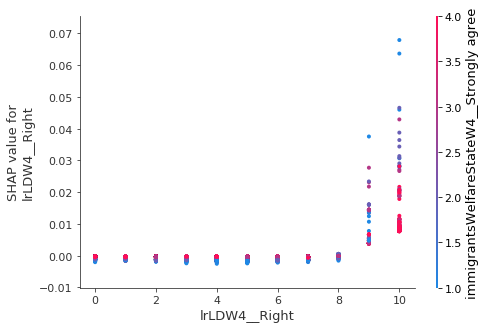

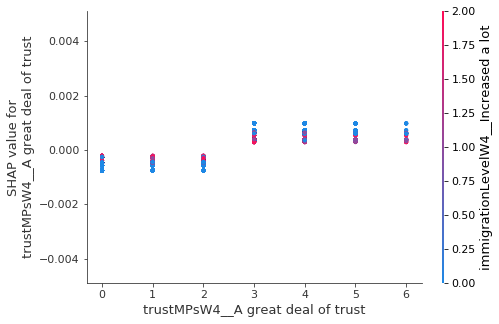

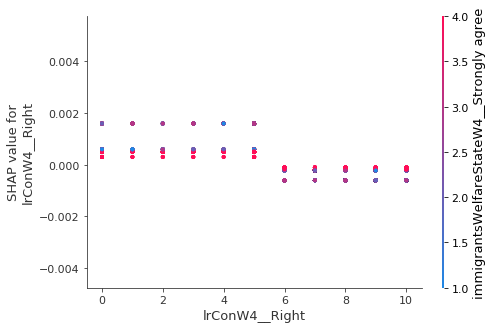

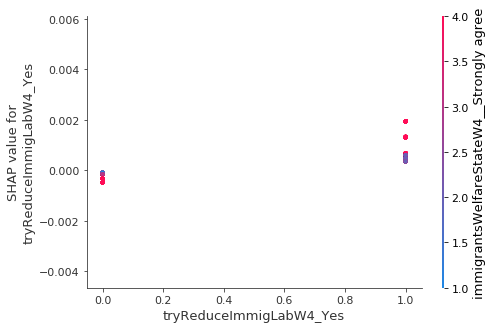

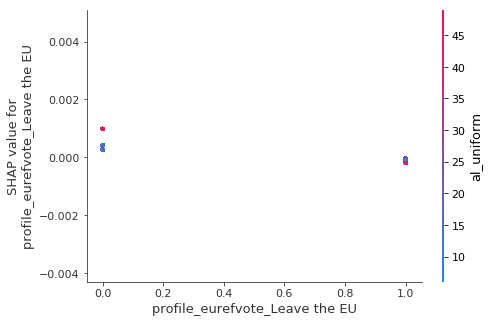

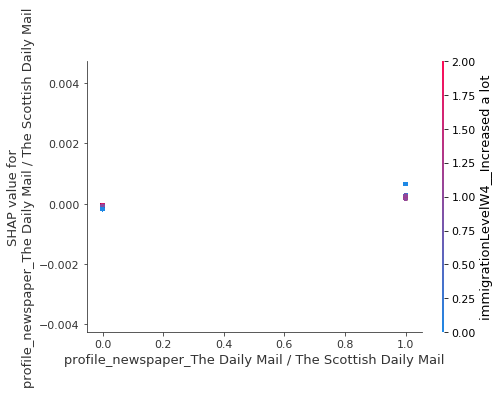

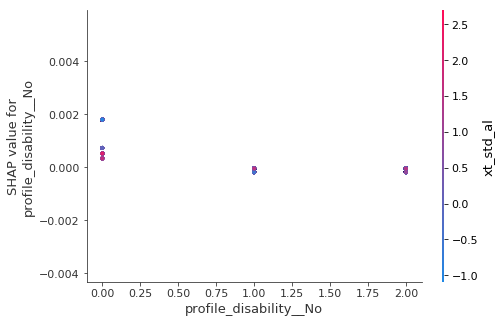

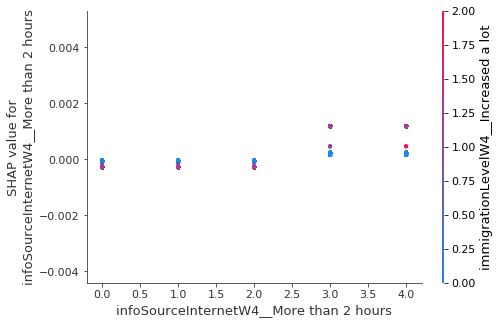

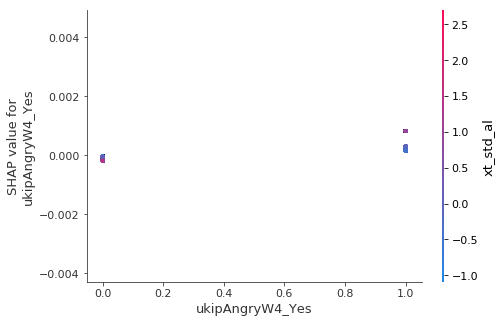

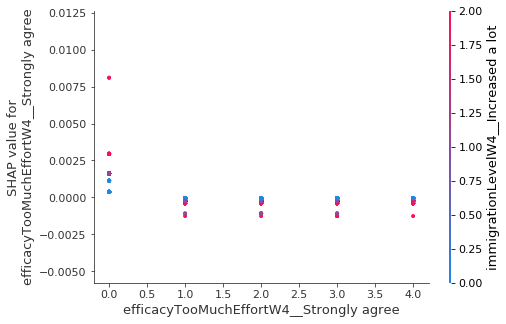

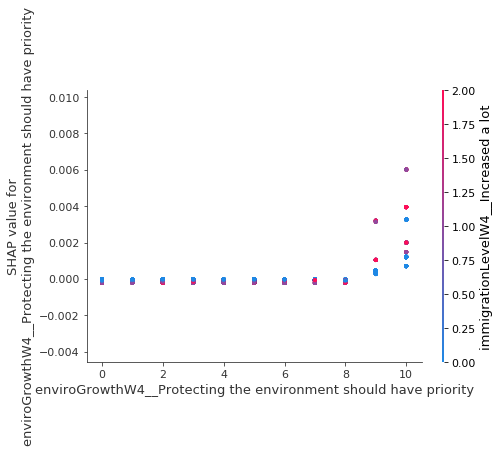

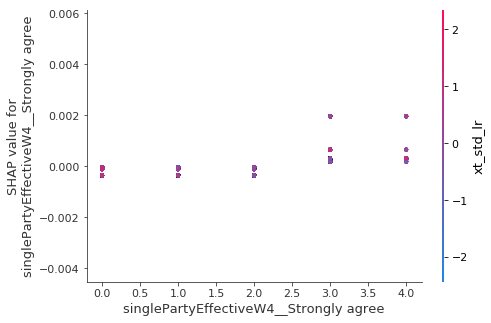

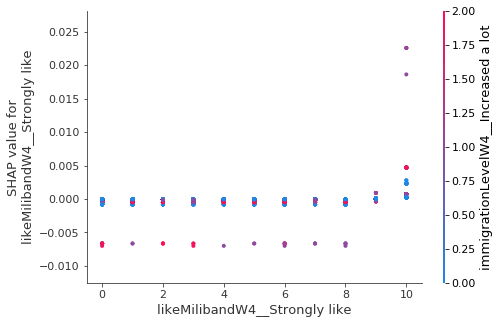

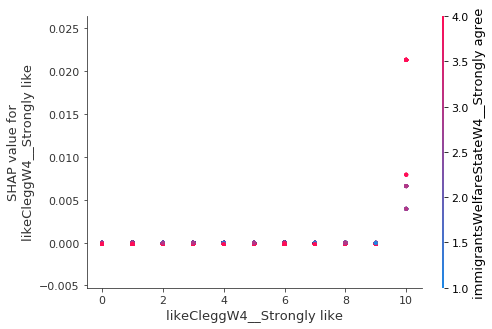

(W4->)immigCult_plus_EcW7 7
missing vals in sample weights: 0
[0]	validation_0-rmse:0.484962
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.467879
[2]	validation_0-rmse:0.451591
[3]	validation_0-rmse:0.436004
[4]	validation_0-rmse:0.421135
[5]	validation_0-rmse:0.406918
[6]	validation_0-rmse:0.393335
[7]	validation_0-rmse:0.380362
[8]	validation_0-rmse:0.368118
[9]	validation_0-rmse:0.356305
[10]	validation_0-rmse:0.345147
[11]	validation_0-rmse:0.334588
[12]	validation_0-rmse:0.324578
[13]	validation_0-rmse:0.315069
[14]	validation_0-rmse:0.306143
[15]	validation_0-rmse:0.297545
[16]	validation_0-rmse:0.289412
[17]	validation_0-rmse:0.281723
[18]	validation_0-rmse:0.274427
[19]	validation_0-rmse:0.267551
MSE: 0.07, MAE: 0.23, EV: 0.08, R2: -1.23


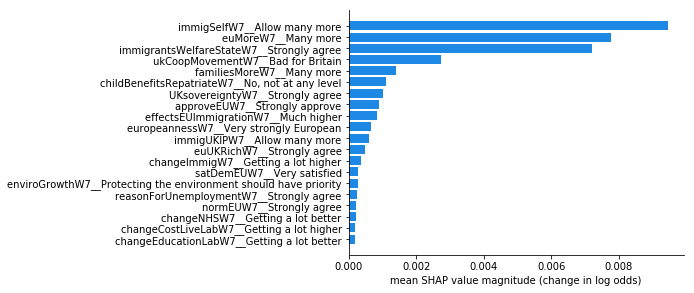

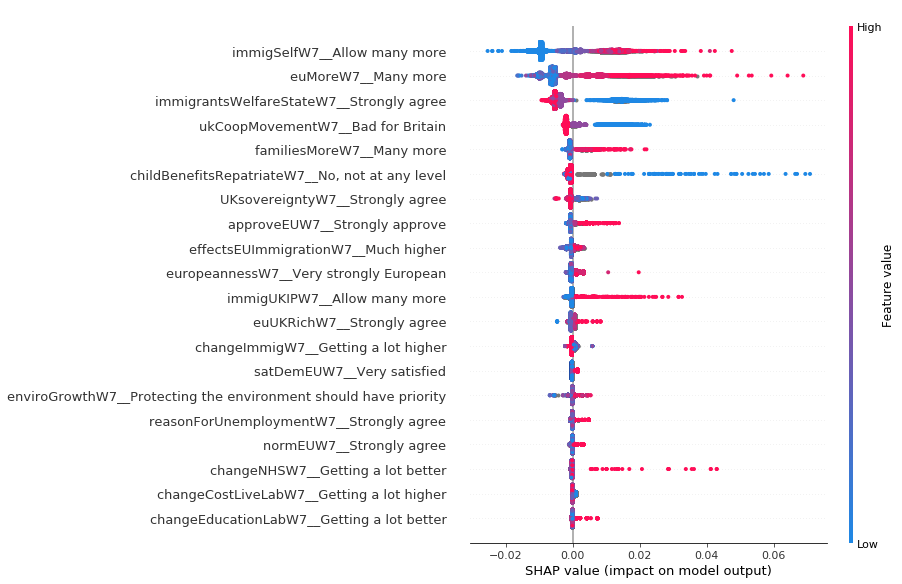

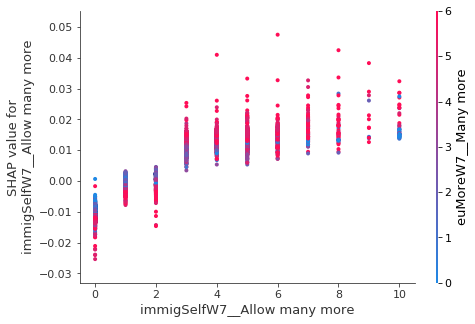

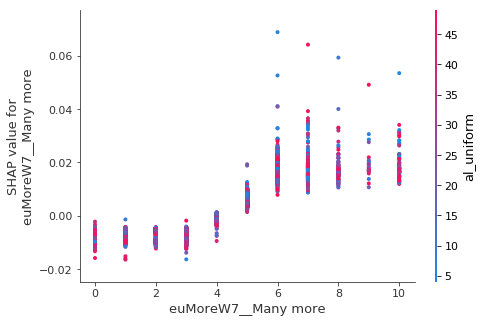

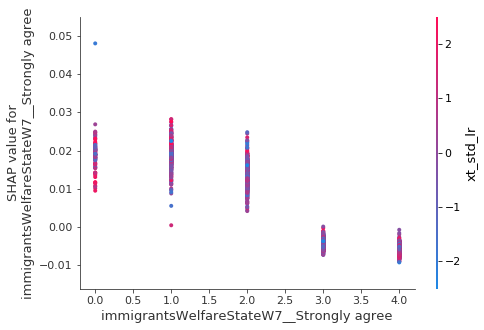

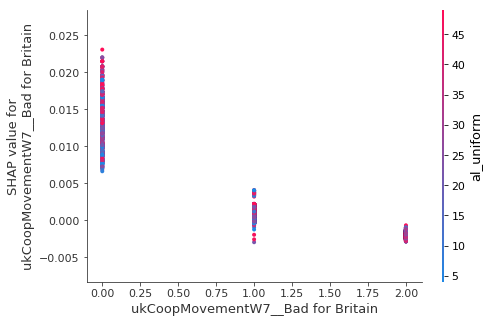

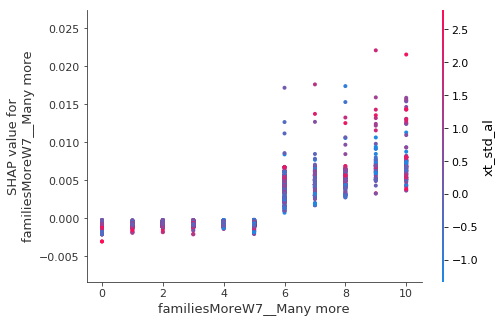

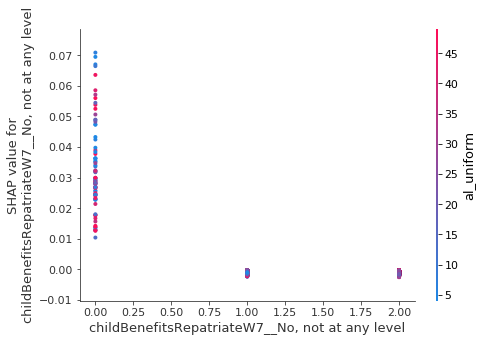

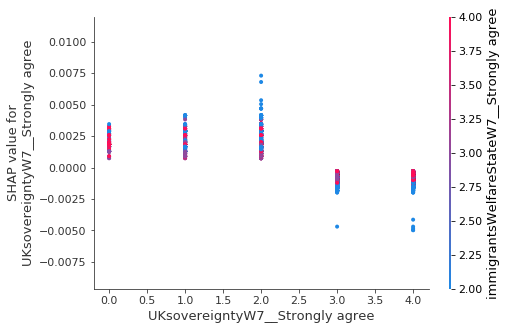

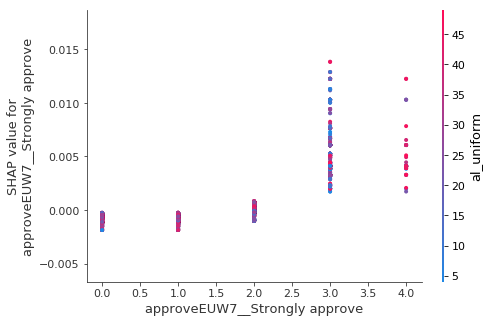

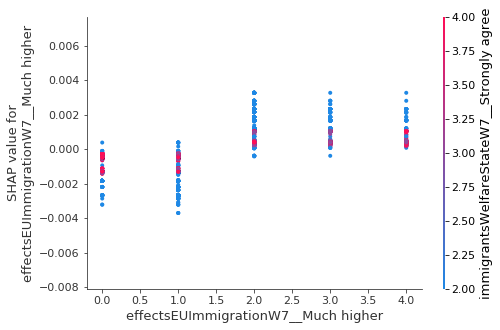

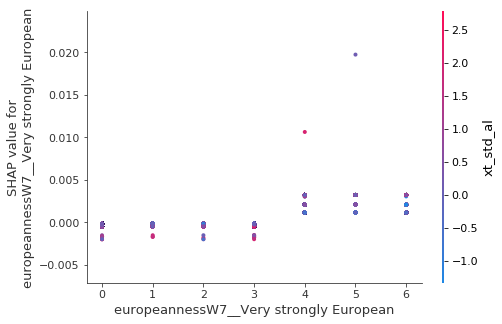

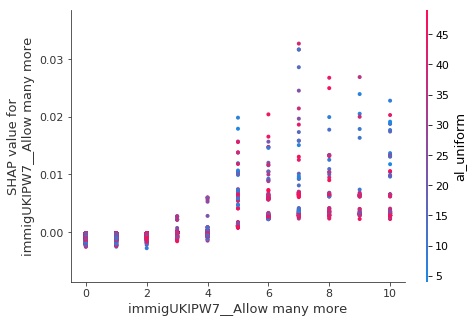

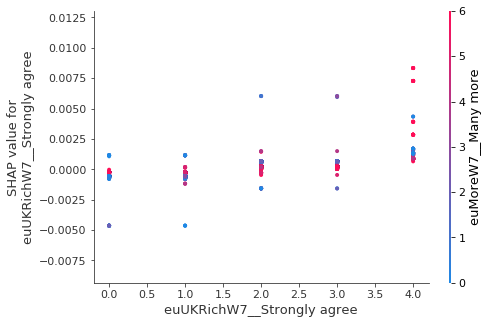

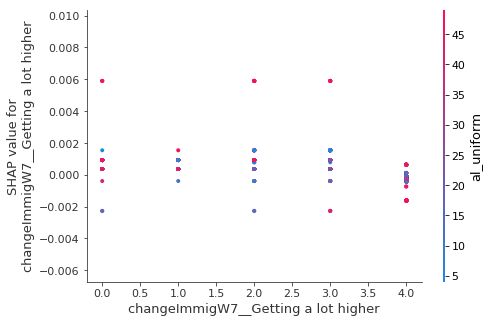

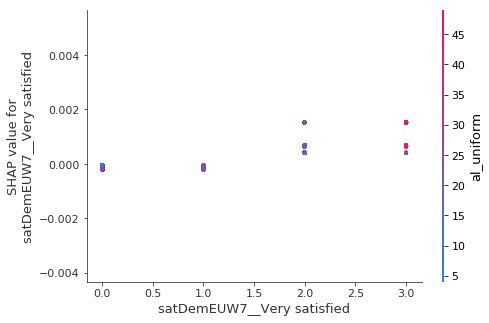

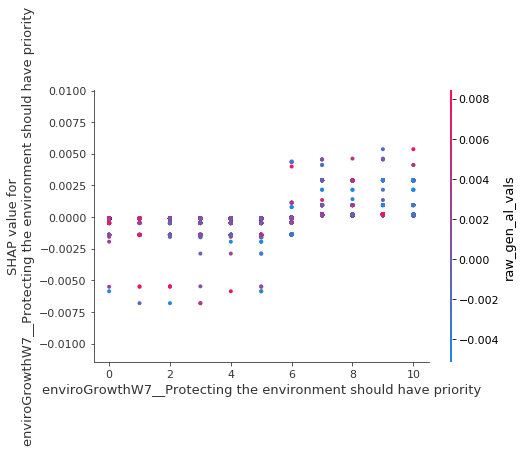

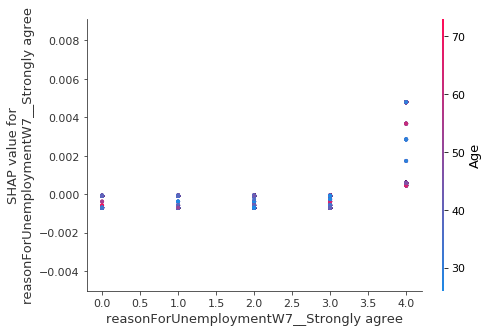

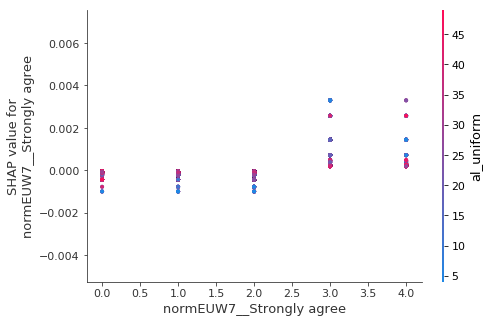

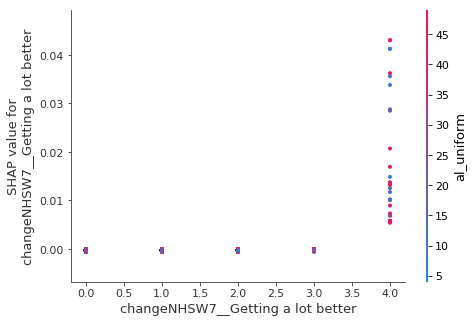

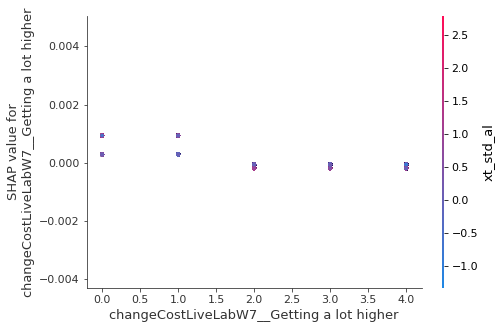

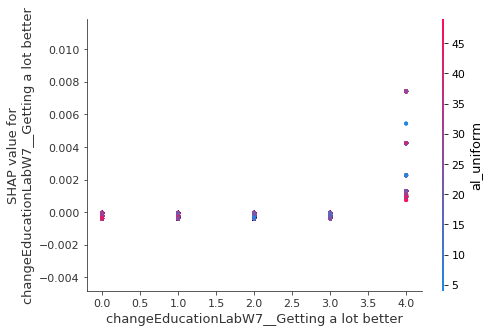

(W7->)immigCult_plus_EcW8 8
missing vals in sample weights: 0
[0]	validation_0-rmse:0.470883
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.454158
[2]	validation_0-rmse:0.438175
[3]	validation_0-rmse:0.422854
[4]	validation_0-rmse:0.408352
[5]	validation_0-rmse:0.394389
[6]	validation_0-rmse:0.381121
[7]	validation_0-rmse:0.368394
[8]	validation_0-rmse:0.356406
[9]	validation_0-rmse:0.344935
[10]	validation_0-rmse:0.333973
[11]	validation_0-rmse:0.323527
[12]	validation_0-rmse:0.313737
[13]	validation_0-rmse:0.304342
[14]	validation_0-rmse:0.29538
[15]	validation_0-rmse:0.286875
[16]	validation_0-rmse:0.278815
[17]	validation_0-rmse:0.271153
[18]	validation_0-rmse:0.263913
[19]	validation_0-rmse:0.257095
MSE: 0.07, MAE: 0.23, EV: 0.04, R2: -1.55


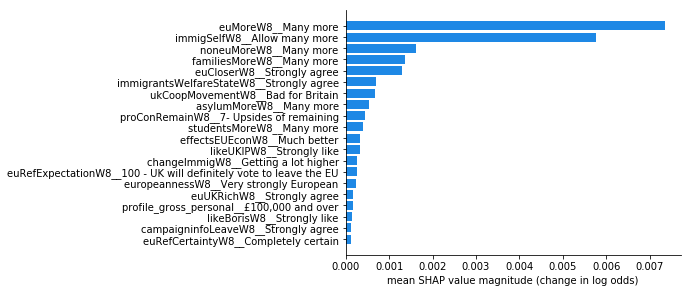

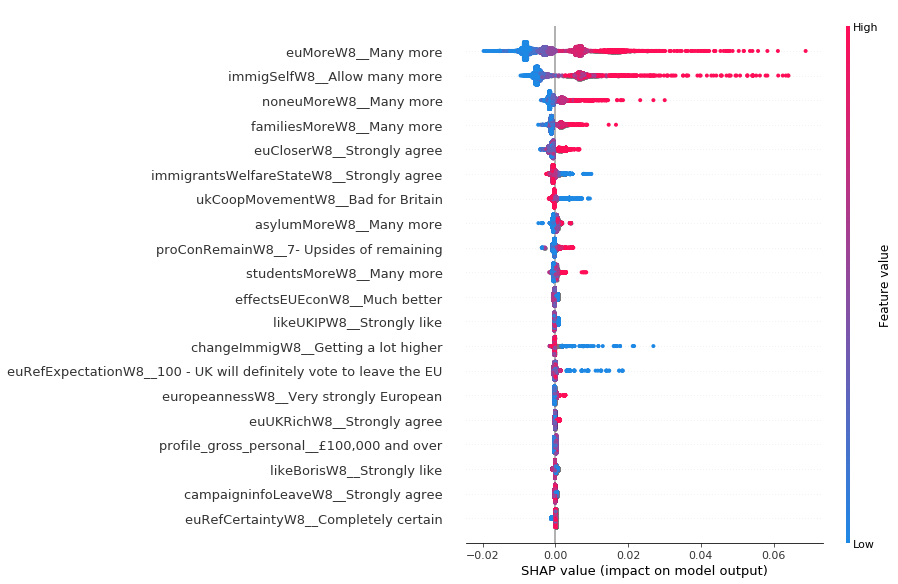

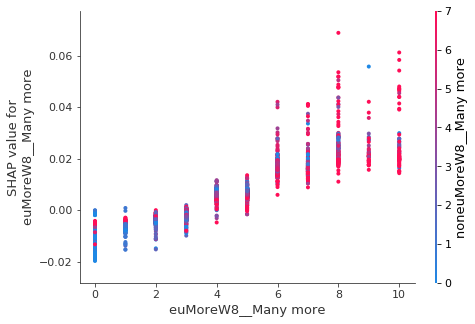

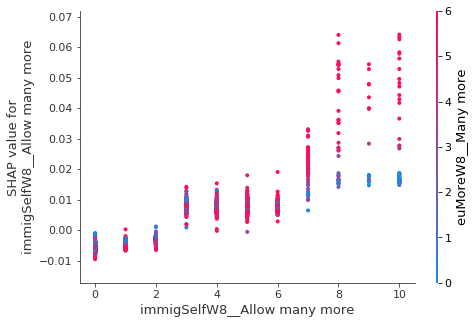

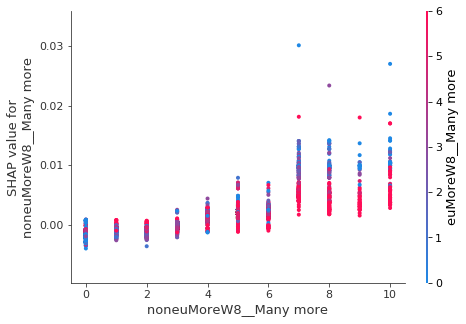

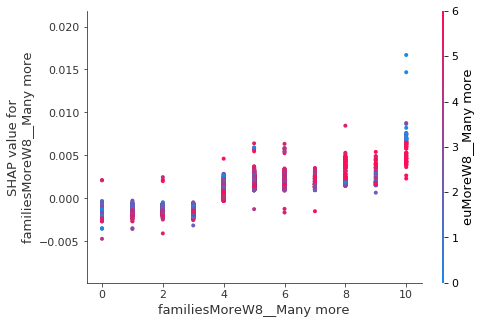

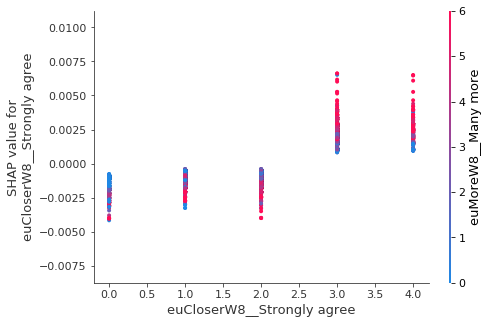

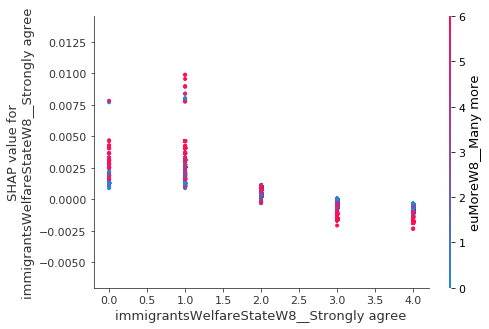

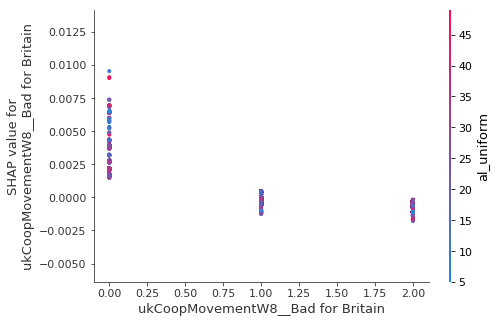

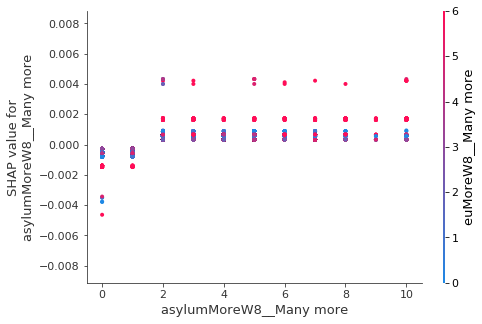

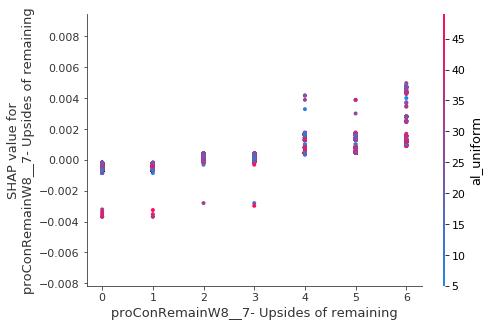

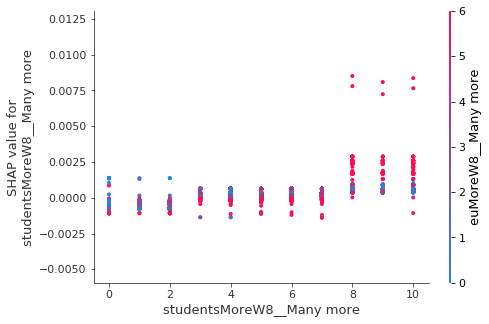

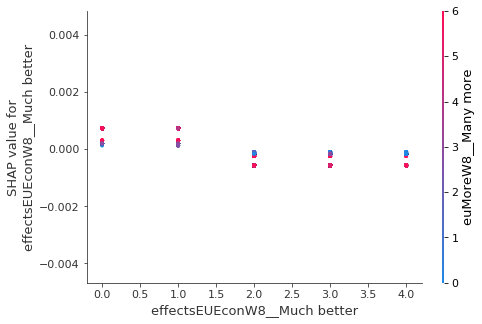

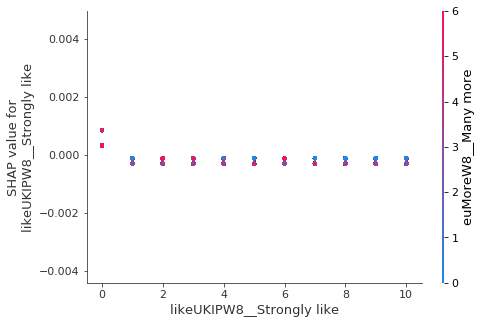

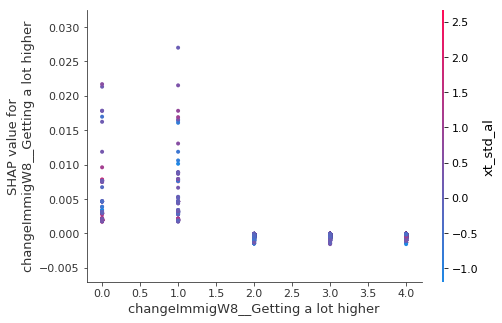

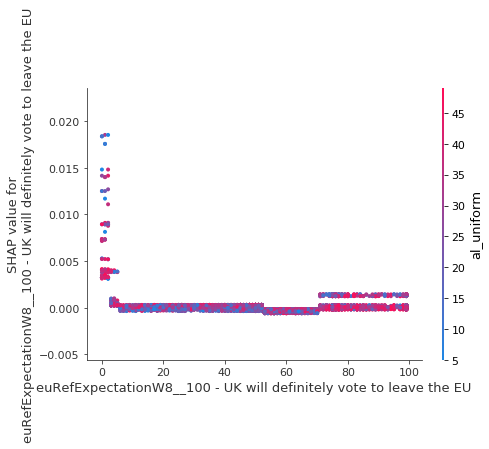

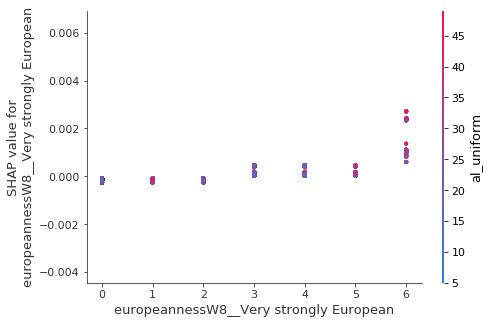

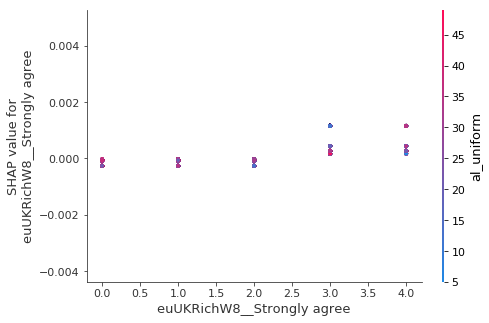

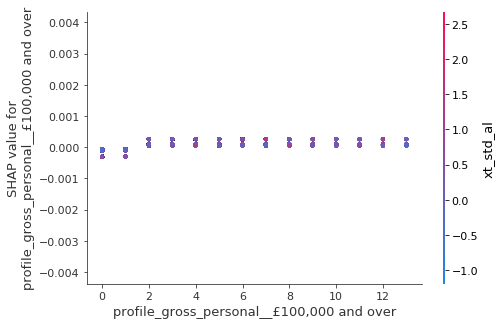

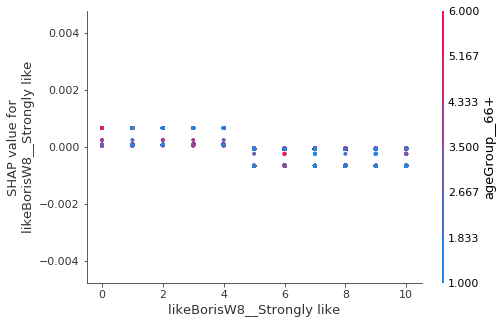

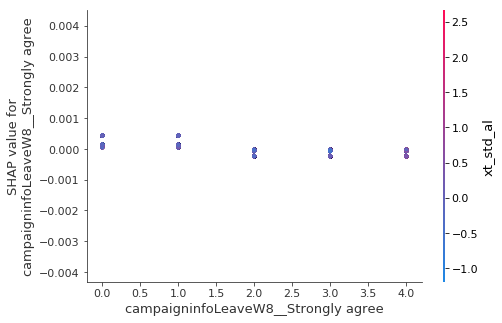

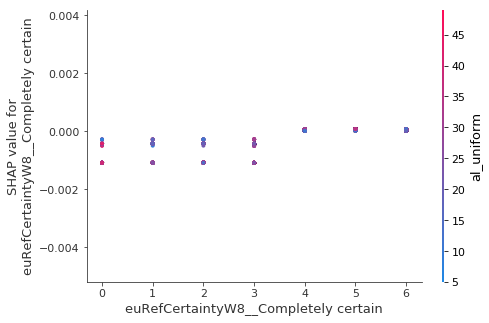

(W8->)immigCult_plus_EcW10 10
missing vals in sample weights: 0
[0]	validation_0-rmse:0.43177
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.417499
[2]	validation_0-rmse:0.404022
[3]	validation_0-rmse:0.391142
[4]	validation_0-rmse:0.378843
[5]	validation_0-rmse:0.367216
[6]	validation_0-rmse:0.356201
[7]	validation_0-rmse:0.345703
[8]	validation_0-rmse:0.335675
[9]	validation_0-rmse:0.326158
[10]	validation_0-rmse:0.317056
[11]	validation_0-rmse:0.308573
[12]	validation_0-rmse:0.300568
[13]	validation_0-rmse:0.292991
[14]	validation_0-rmse:0.285729
[15]	validation_0-rmse:0.278853
[16]	validation_0-rmse:0.272391
[17]	validation_0-rmse:0.266312
[18]	validation_0-rmse:0.260667
[19]	validation_0-rmse:0.255263
MSE: 0.07, MAE: 0.22, EV: 0.07, R2: -0.79


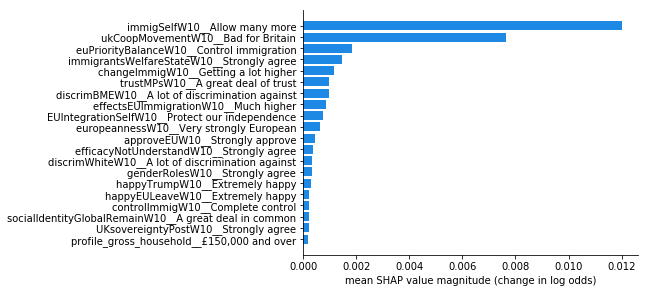

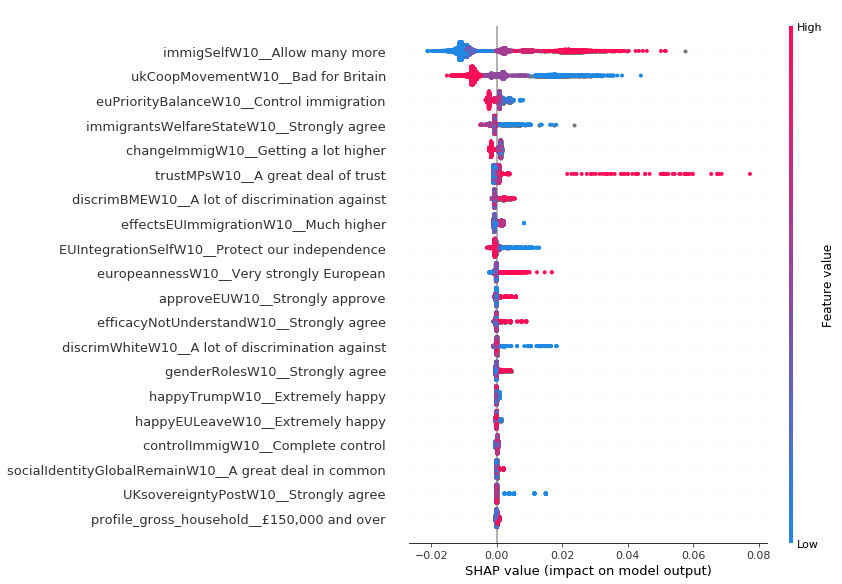

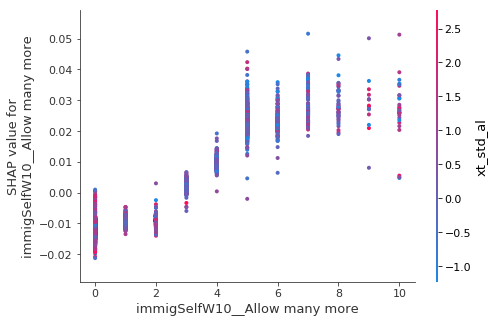

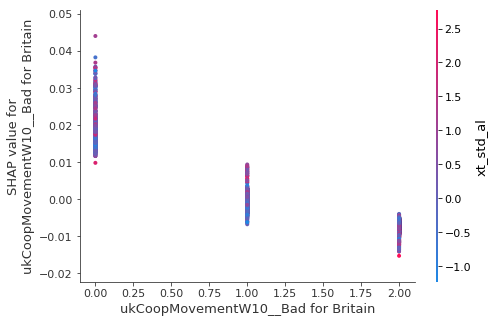

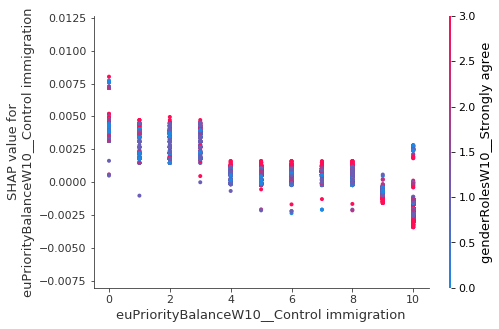

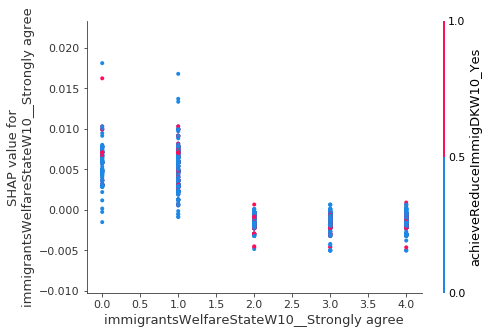

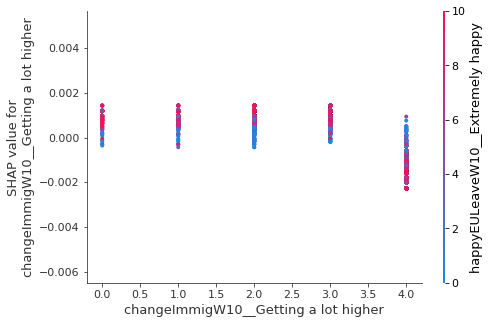

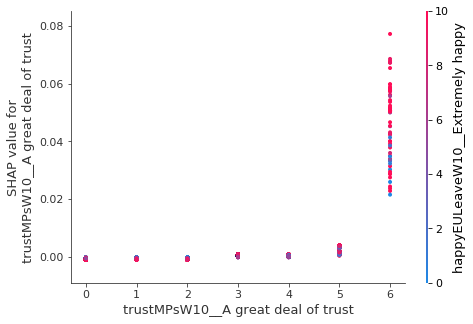

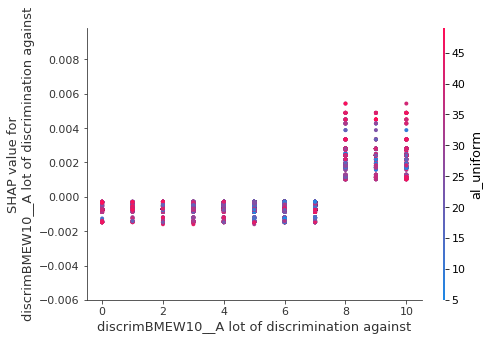

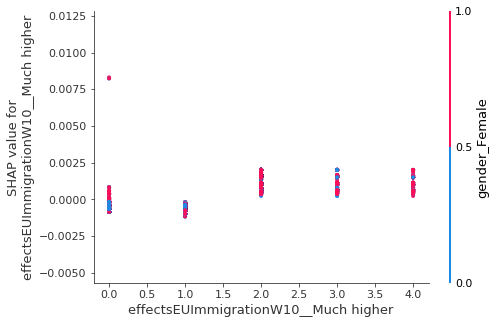

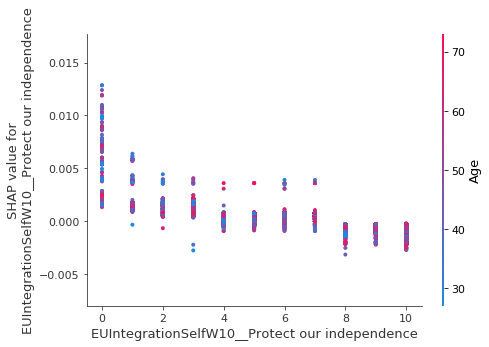

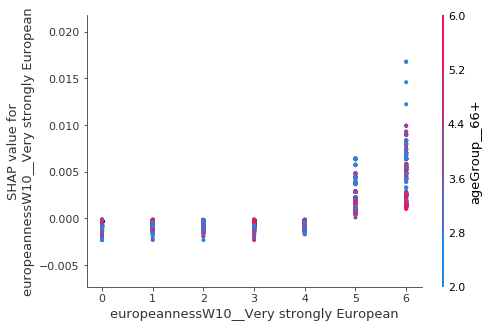

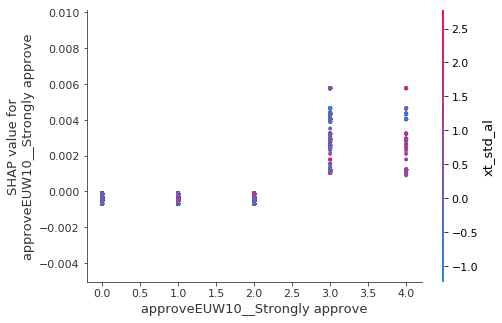

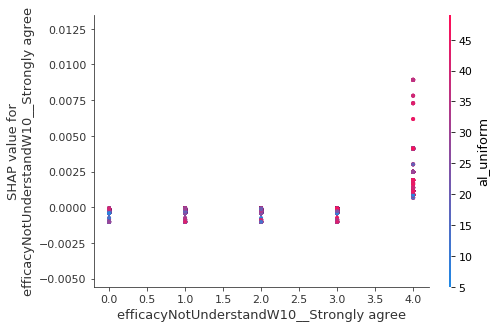

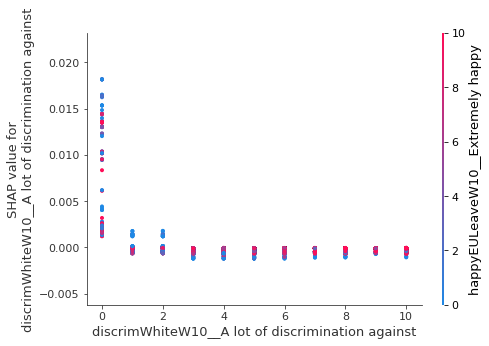

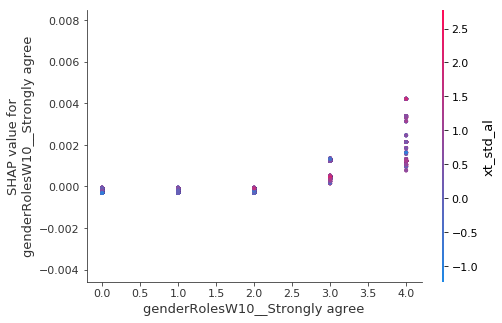

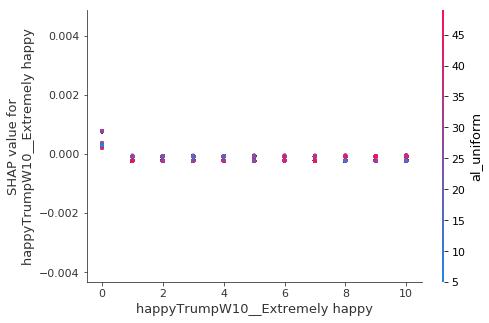

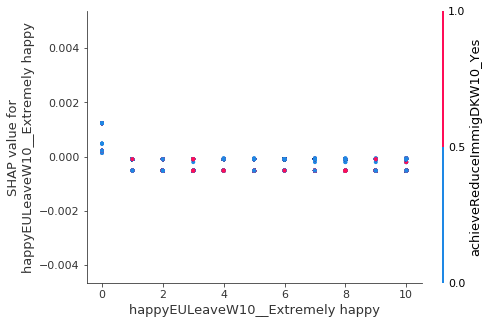

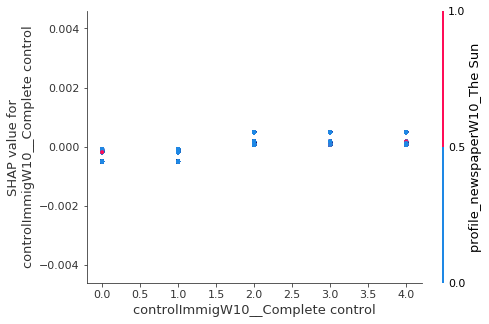

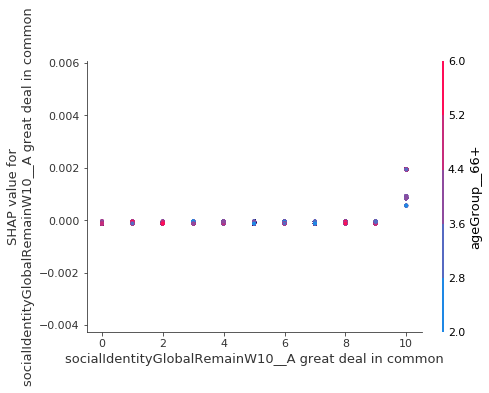

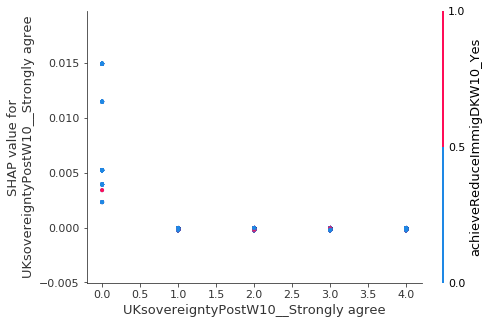

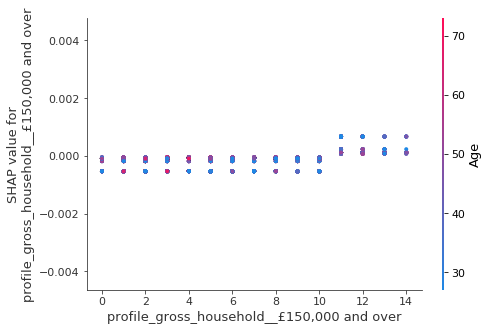

(W10->)immigCult_plus_EcW11 11
missing vals in sample weights: 0
[0]	validation_0-rmse:0.446768
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.431509
[2]	validation_0-rmse:0.416806
[3]	validation_0-rmse:0.402871
[4]	validation_0-rmse:0.389486
[5]	validation_0-rmse:0.37684
[6]	validation_0-rmse:0.364655
[7]	validation_0-rmse:0.353206
[8]	validation_0-rmse:0.342306
[9]	validation_0-rmse:0.331956
[10]	validation_0-rmse:0.322169
[11]	validation_0-rmse:0.312952
[12]	validation_0-rmse:0.303975
[13]	validation_0-rmse:0.295579
[14]	validation_0-rmse:0.287644
[15]	validation_0-rmse:0.280147
[16]	validation_0-rmse:0.273137
[17]	validation_0-rmse:0.266444
[18]	validation_0-rmse:0.260114
[19]	validation_0-rmse:0.254119
MSE: 0.06, MAE: 0.22, EV: 0.05, R2: -1.08


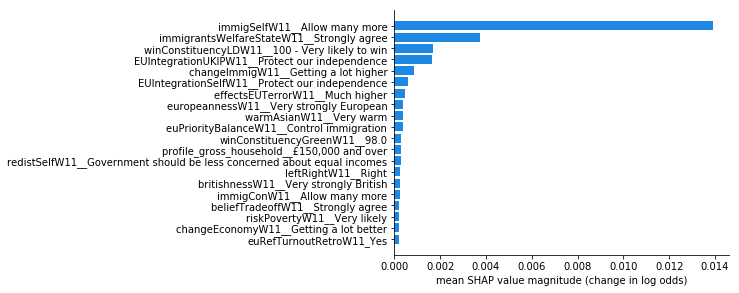

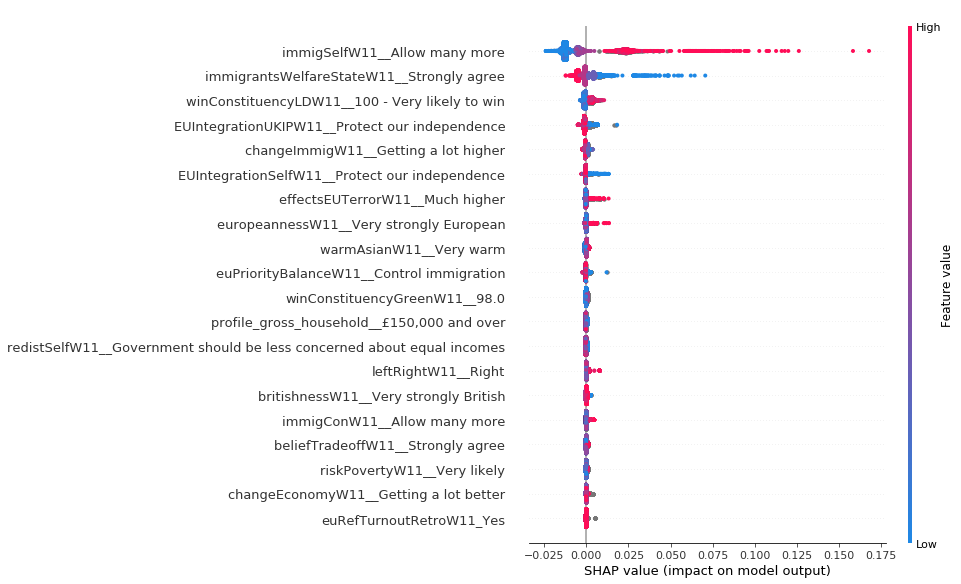

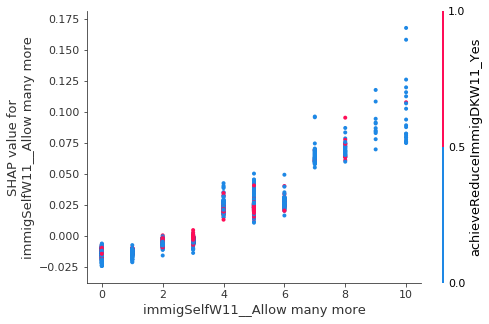

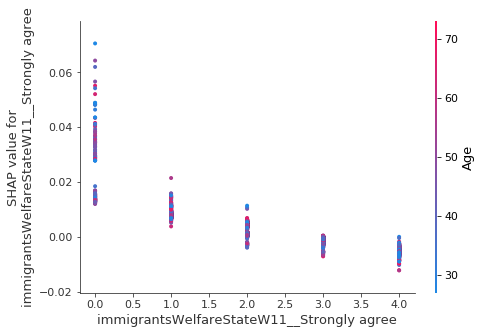

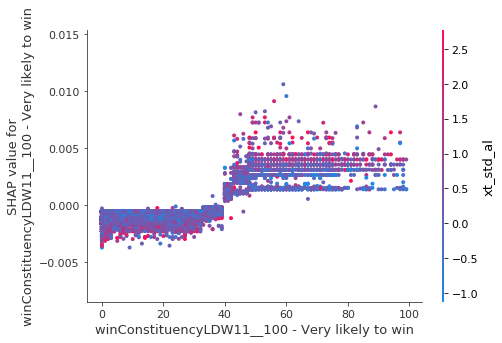

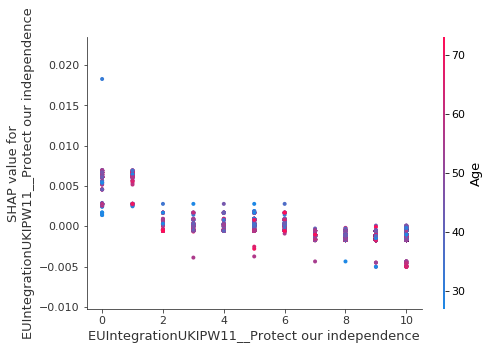

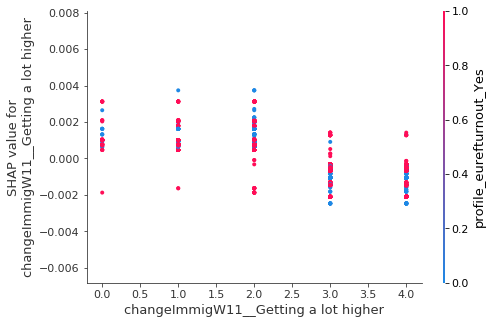

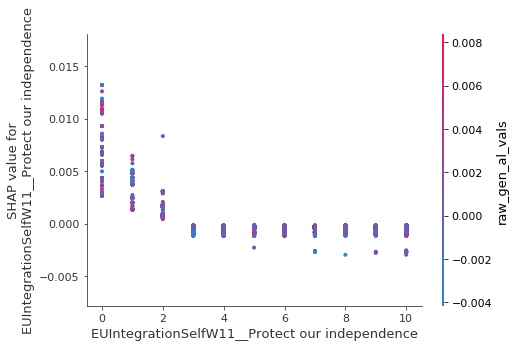

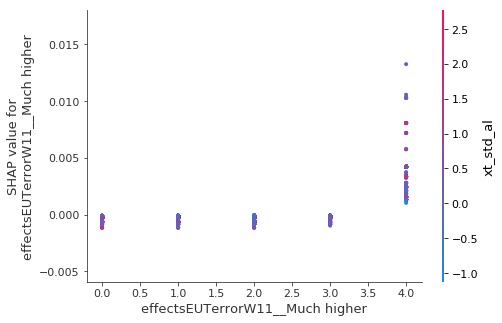

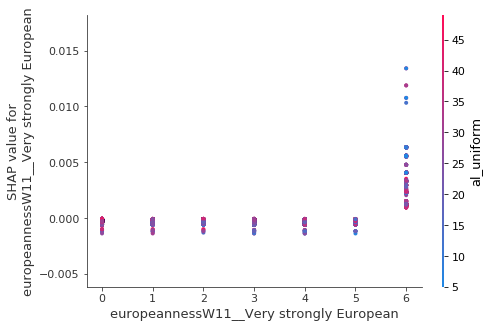

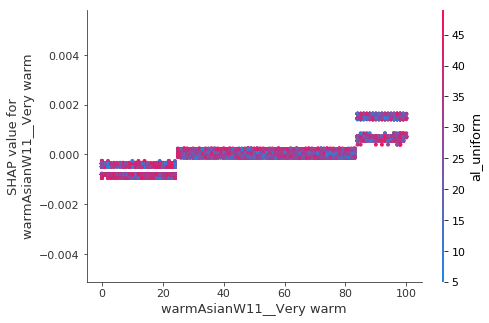

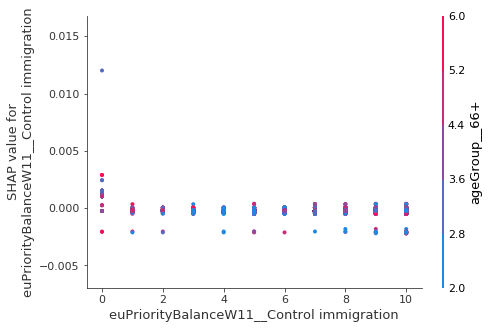

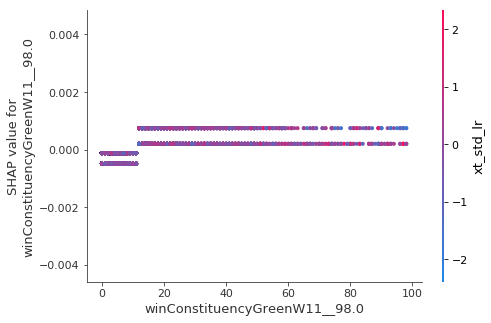

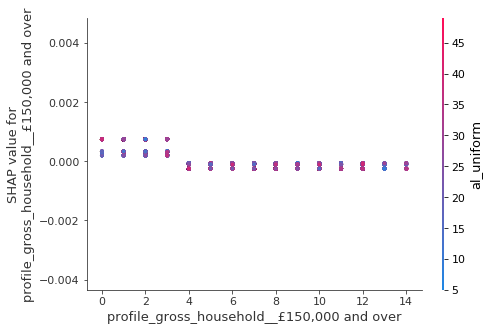

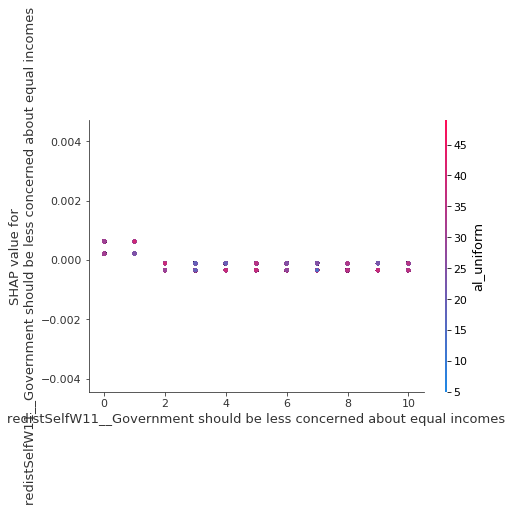

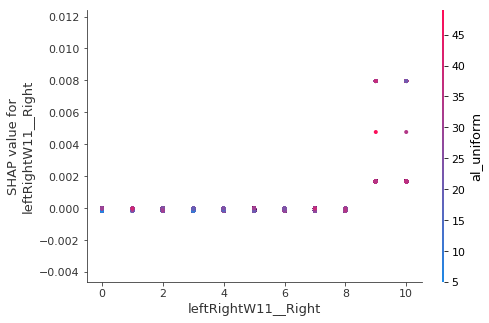

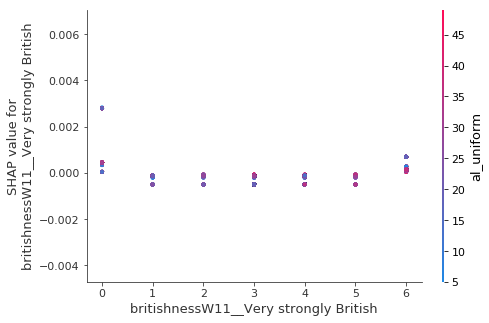

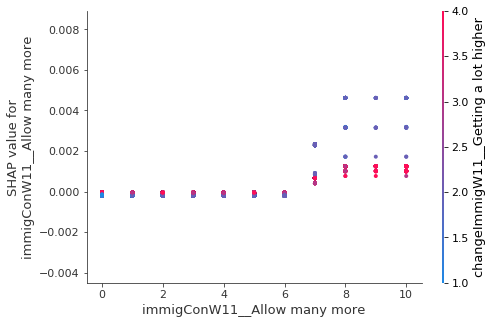

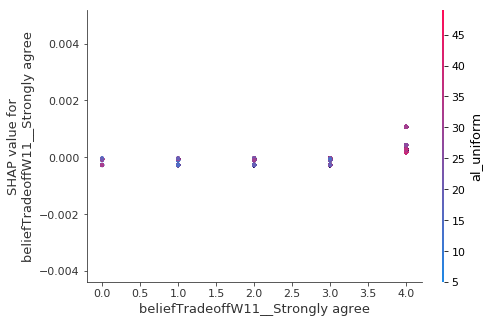

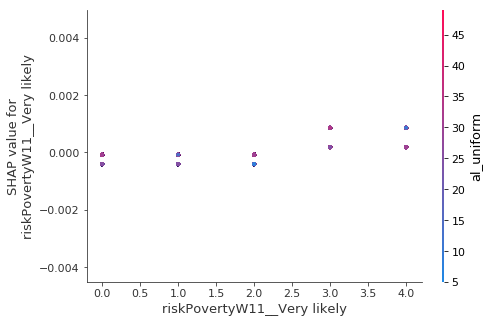

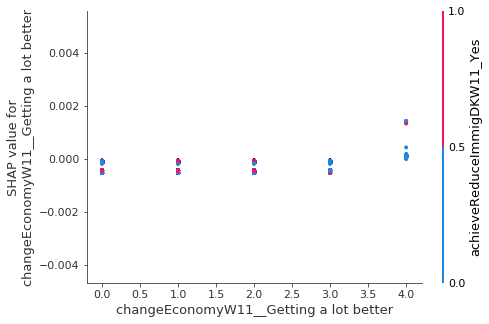

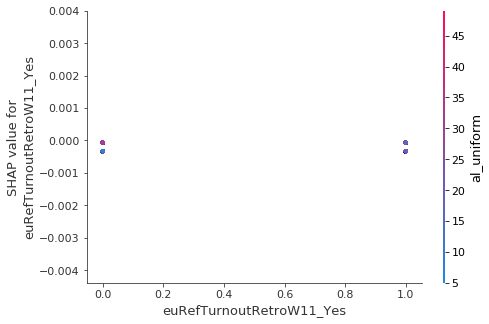

(W11->)immigCult_plus_EcW13 13
missing vals in sample weights: 0
[0]	validation_0-rmse:0.497531
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.479856
[2]	validation_0-rmse:0.462993
[3]	validation_0-rmse:0.446874
[4]	validation_0-rmse:0.431418
[5]	validation_0-rmse:0.41672
[6]	validation_0-rmse:0.402711
[7]	validation_0-rmse:0.389336
[8]	validation_0-rmse:0.376494
[9]	validation_0-rmse:0.364327
[10]	validation_0-rmse:0.352772
[11]	validation_0-rmse:0.341785
[12]	validation_0-rmse:0.331216
[13]	validation_0-rmse:0.321189
[14]	validation_0-rmse:0.311678
[15]	validation_0-rmse:0.302667
[16]	validation_0-rmse:0.294099
[17]	validation_0-rmse:0.285947
[18]	validation_0-rmse:0.278268
[19]	validation_0-rmse:0.270924
MSE: 0.07, MAE: 0.24, EV: 0.04, R2: -1.69


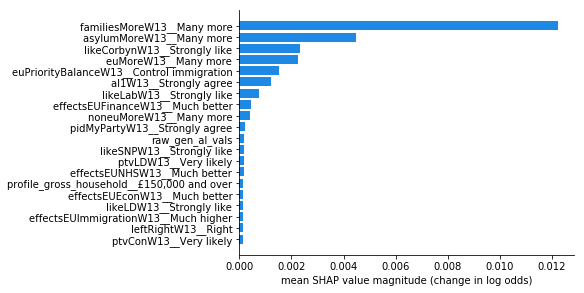

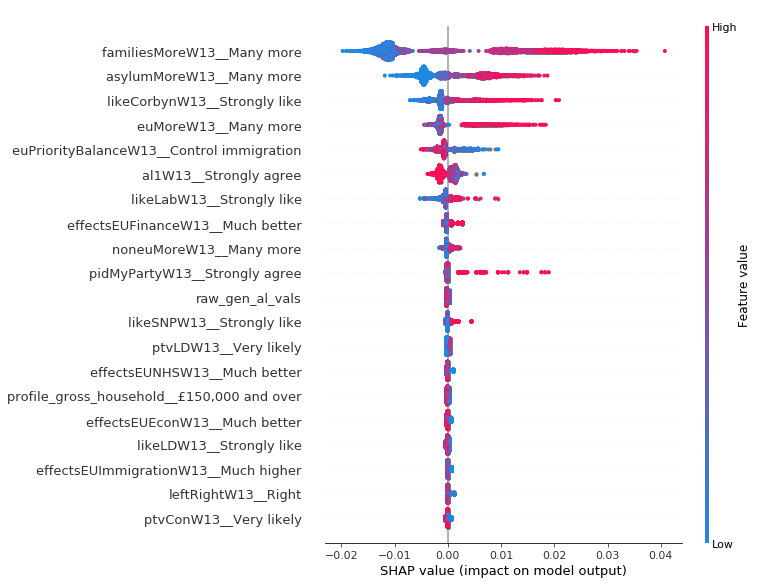

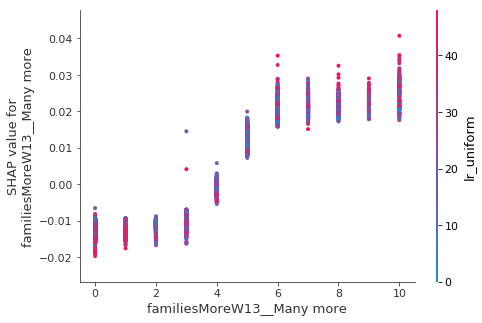

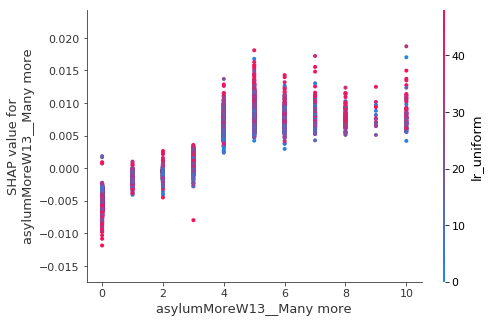

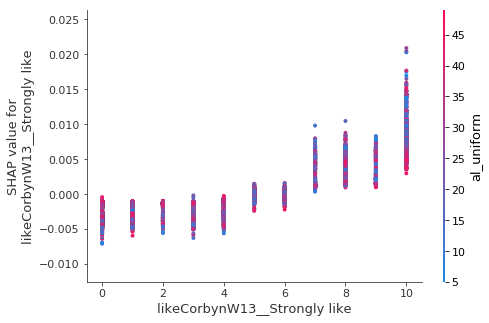

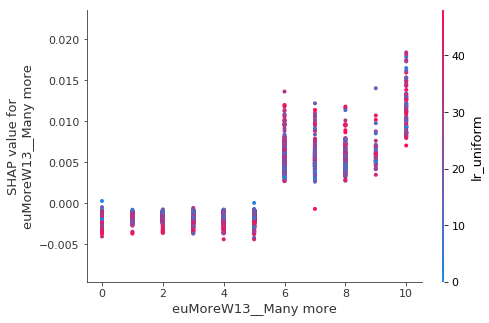

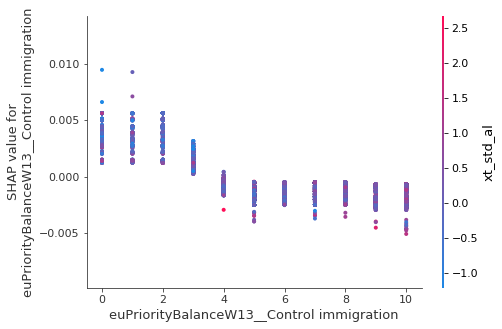

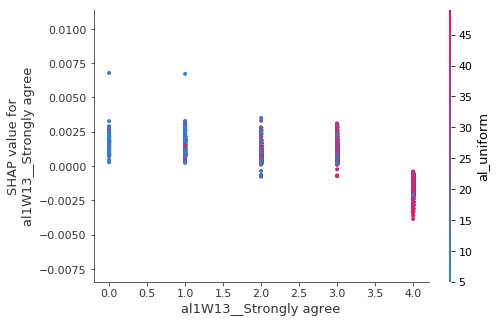

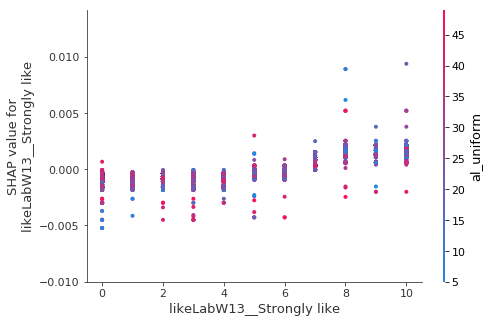

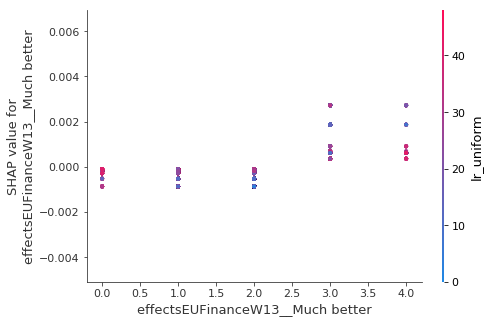

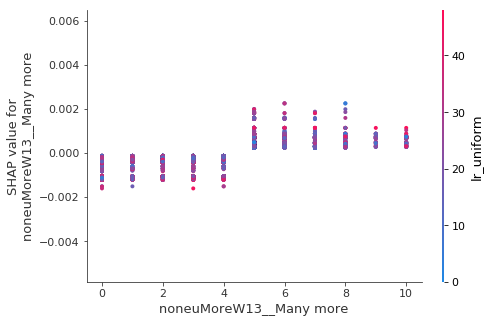

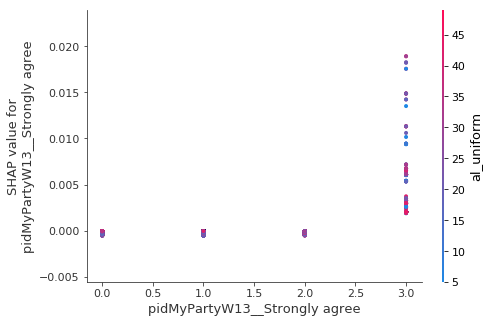

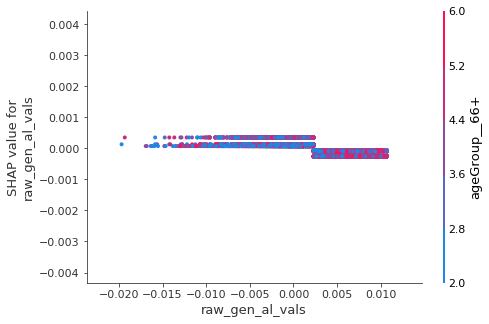

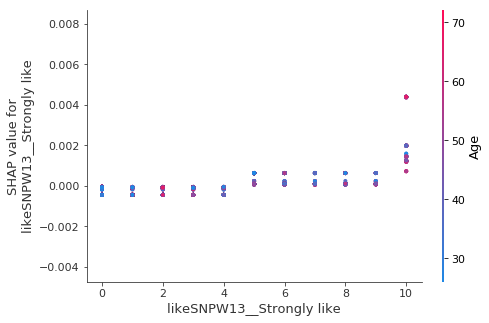

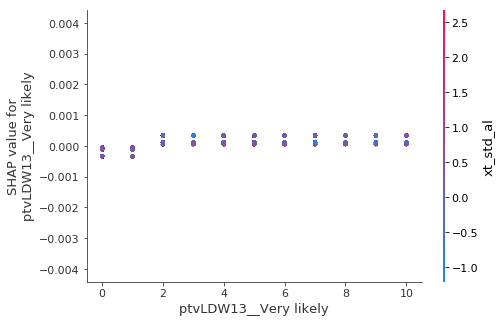

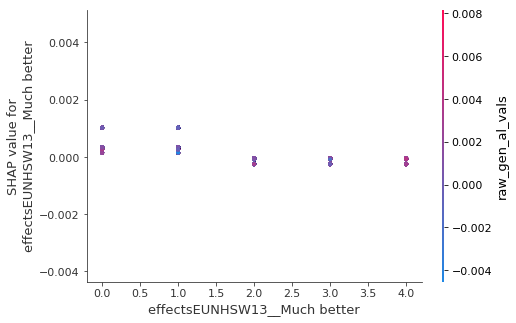

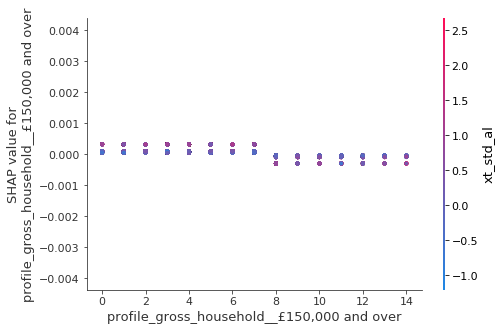

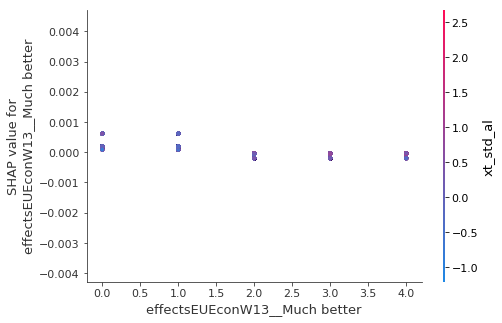

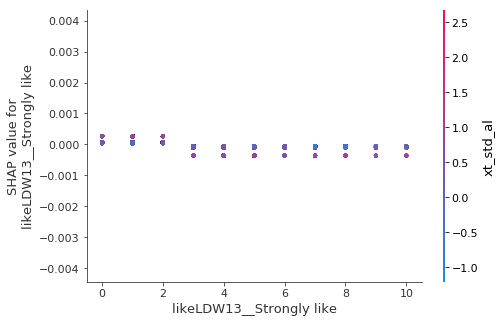

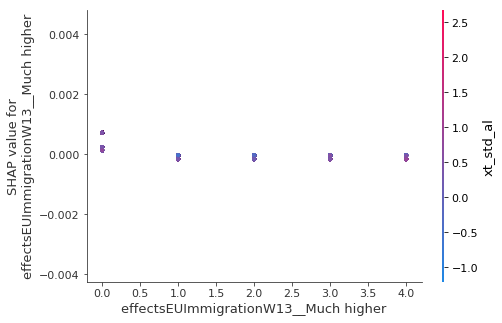

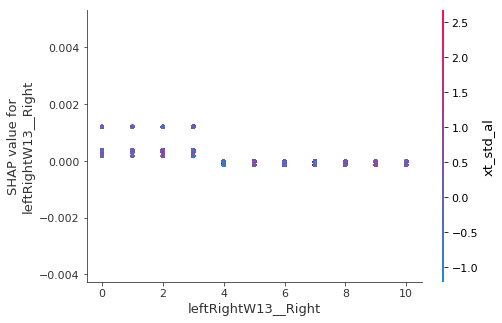

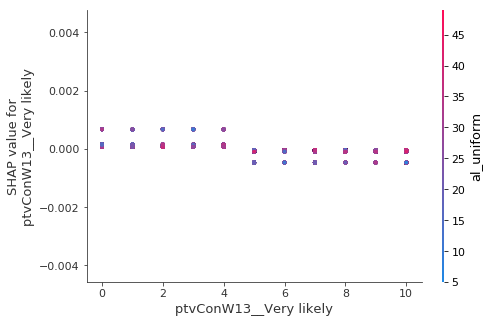

Wall time: 15min 4s


In [105]:
%%time
# target_var = "immigSelfW10__Allow many more"
# weight_var = 'wt_new_W10'  


# 'wt_new_W10'

#'wt_full_W9'
# track base variable in list
for target_var,base_var in zip(var_list,base_list):
    
#     wave_no = 10
    wave_no = int( re.search( 'W(\d+)$', target_var ).groups()[0] )
    weight_var = num_to_weight[wave_no]
    
    print( target_var, wave_no )
    
#     mask  = immigDiff[target_var].notnull()
#     target = immigDiff[target_var][mask]
#     mask = immigDiff[diff_list ].notnull().all(axis=1)
    mask = immigDiff[target_var].notnull()
    base = BES_reduced_with_na[base_var]
#     base_var = base_var +1
#     mask = mask & (base >= base.quantile(0.25)) & (base <=base.quantile(0.75))    
    mask = mask & (base <=base.quantile(0.5))
    target = immigDiff[target_var][mask]
#     target = immigDiff[diff_list ].mean(axis=1)[mask]
    
    
    train  = BES_reduced_with_na[mask].copy()
    train = pd.concat([train,immigDiff[mask]],axis=1)
#     train  = train.drop(target_var, axis=1)    
    
#     mask   = changeImmigCultural.notnull()    
#     target = changeImmigCultural[mask]
    
#     train  = train.drop(target_var, axis=1)
    

    
#     mask   = BES_reduced_with_na[target_var].notnull()
#    target = BES_reduced_with_na[target_var][mask]
#     mask   = train[target_var].notnull()
    
    
    # remove zero variance columns
    train  = train.drop(train.columns[train.var()==0], axis=1)
    
    # add pan_dataset_values columns
    train  = pd.concat([train,pan_dataset_values.drop('id',axis=1)[mask]],axis=1)
    train  = train.drop("genImmigSentiment", axis=1)
    
    # drop variables that definitely involve *some* downsteam component - e.g. target is W4, predictor is W6
    
    other_waves = "("+"|".join([num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]) +")" +"([^0-9]|$)"
    train = train.drop( [x for x in train.columns if re.search(other_waves,x)] , axis=1 )   
    
#     for future_wave in [num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]:
#         train = train.drop([x for x in train.columns if re.search(future_wave+"[^0-9]",x)], axis=1)
#     train = train.drop([x for x in train.columns if ("W10" in x)|("W11" in x)|("W12" in x)|("W13" in x)], axis=1)

    for var_stub in var_stub_list:
        train = train.drop([x for x in train.columns if var_stub in x], axis=1)
    
#     train = train.drop([x for x in train.columns if "immigCultural" in x], axis=1)      
#     train = train.drop([x for x in train.columns if "euRefVote" in x], axis=1)    


    sample_weights = BES_Panel[weight_var][mask]
    print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
    sample_weights = sample_weights.fillna(sample_weights.median())

    output_subfolder = BES_output_folder + "xgboost_test" + os.sep + target_var.replace(">","") + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )


    ############################

    alg = XGBRegressor(
     learning_rate =0.04,
     n_estimators= 20,
     max_depth=3,
     min_child_weight=1,
     gamma=0,
     subsample=0.75,
     colsample_bytree=0.9,
     colsample_bylevel=.85,
     objective= 'reg:linear',
     scale_pos_weight=1.0,
     reg_alpha=0,
     reg_lambda=1,
     njobs=3,
     seed=27)

    # split data into train and test sets
    # fit, validate and find overfitting limit
    seed = 7
    test_size = 0.33

    X_train, X_test, y_train, y_test = train_test_split(pd.concat([train,sample_weights],axis=1), target, test_size=test_size,
                                                        random_state=seed, stratify=round(target))



    eval_set = [(X_test, y_test)]

    sample_weight = X_train[weight_var].values
    sample_weight_eval_set = X_test[weight_var].values
    X_train.drop(weight_var, axis=1, inplace=True)
    X_test.drop(weight_var, axis=1, inplace=True)

    alg.fit(X_train, y_train, eval_metric='rmse', 
            early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
            verbose=True, sample_weight= sample_weight)

    # make predictions for test data
    predictions = alg.predict(X_test)

    # evaluate predictions
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    EV = explained_variance_score(y_test, predictions)
    R2 = r2_score(y_test, predictions)

    print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
    alg.set_params(n_estimators=alg.best_iteration)

    ####################################
    # fit to full dataset at non-overfitting level
    alg.fit(train, target, verbose=True, sample_weight= sample_weights)




    shap_values = shap.TreeExplainer(alg).shap_values(train);


    #################################
    threshold = .1
    min_features = 20
    global_shap_vals = np.abs(shap_values).mean(0)[:-1]
    n_top_features = sum(global_shap_vals[np.argsort(global_shap_vals)]>=threshold)
    if n_top_features <min_features:
        n_top_features = min_features



    ##########################

    inds = np.argsort(global_shap_vals)[-n_top_features:]

    y_pos = np.arange(n_top_features)
    plt.figure(figsize=(16,10))
    plt.barh(y_pos, global_shap_vals[inds], color="#1E88E5")
    plt.yticks(y_pos, train.columns[inds])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("mean SHAP value magnitude (change in log odds)")
    plt.gcf().set_size_inches(6, 4.5)

    plt.savefig(output_subfolder + "mean_impact" + ".png", bbox_inches='tight')

    plt.show()

    ####################
    fig = plt.figure()
    shap.summary_plot(shap_values, train, max_display=n_top_features, plot_type='dot');
    fig.savefig(output_subfolder + "summary_plot" + ".png", bbox_inches='tight')



    ##################
    count = 0
    for name in train.columns[inds[::-1]]:
        fig = plt.figure(figsize = (16,10))    
        shap.dependence_plot(name, shap_values, train)
        fig.savefig(output_subfolder + "featureNo "+str(count) + " " + name.replace("/","_") + ".png", bbox_inches='tight')
        count = count + 1

In [ ]:
# 8 variables x 20 (displayed) features x 20 n_estimators -> 15 minutes

In [106]:
other_waves

'(W1|W2|W3|W4|W5|W6|W7|W8|W9|W10|W11|W12)([^0-9]|$)'

In [ ]:
### Now try with euRefVote

In [108]:
corr = pd.read_hdf(data_subfolder +"corr_dfW13Panel.hdf")

In [109]:
corr

var1                             var2  \
0       generalElectionVoteUnsqueezeW4            generalElectionVoteW4   
1         generalElectionVoteSqueezeW4            generalElectionVoteW4   
2            generalElectionVotePostW5            generalElectionVoteW5   
3       generalElectionVoteUnsqueezeW5            generalElectionVoteW5   
4         generalElectionVoteSqueezeW5            generalElectionVoteW5   
5      generalElectionVoteUnsqueezeW11           generalElectionVoteW11   
6        generalElectionVoteSqueezeW11           generalElectionVoteW11   
7           generalElectionVotePostW12           generalElectionVoteW12   
8      generalElectionVoteUnsqueezeW12           generalElectionVoteW12   
9        generalElectionVoteSqueezeW12           generalElectionVoteW12   
10          generalElectionCertaintyW5   generalElectionCertaintyUnsqW5   
11          generalElectionCertaintyW5     generalElectionCertaintySqW5   
12         generalElectionCertaintyW12  generalElectionCertaintyUnsqW12   
13         generalElectionCertaintyW12    generalElectionCertaintySqW12   
14                            ptvConW1                        likeConW1   
15                            ptvConW1                         likePCW1   
16                            ptvConW1                       likeUKIPW1   
17                            ptvLabW1                        likeLabW1   
18                            ptvLabW1                        likeSNPW1   
19                             ptvLDW1                         likeLDW1   
20                            ptvSNPW1                        likeLabW1   
21                            ptvSNPW1                        likeSNPW1   
22                             ptvPCW1                        likeLabW1   
23                             ptvPCW1                        likeGrnW1   
24                            ptvGrnW1                        likeSNPW1   
25              eesEUIntegrationSelfW1                          ptvPCW1   
26               eesEUIntegrationConW1                         ptvLabW1   
27               eesEUIntegrationConW1                         ptvGrnW1   
28                eesEUIntegrationLDW1                         ptvLabW1   
29                eesEUIntegrationLDW1                         ptvGrnW1   
...                                ...                              ...   
14978          speakWelshW1_W4W7W9_W12              referendumrecallW13   
14979           polKnowKerryW2W3W4W7W9              headHouseholdPastW3   
14980             scotRefTurnoutW4_W13             govtHandleCostLiveW1   
14981             scotRefTurnoutW4_W13                 govtHandleEconW1   
14982             scotRefTurnoutW4_W13                govtHandleImmigW1   
14983             scotRefTurnoutW4_W13                  govtHandleNHSW1   
14984             scotRefTurnoutW4_W13                 govtHandleEducW1   
14985             scotRefTurnoutW4_W13           govtHandleLevelCrimeW1   
14986             scotRefTurnoutW4_W13                      pidWeTheyW1   
14987             scotRefTurnoutW4_W13              pidCriticisePartyW1   
14988             scotRefTurnoutW4_W13              partyContactCon_2W2   
14989             scotRefTurnoutW4_W13              winConstituencyPCW4   
14990             scotRefTurnoutW4_W13          tryReduceInequalityPCW4   
14991             scotRefTurnoutW4_W13                         pcFearW4   
14992             scotRefTurnoutW4_W13    devoResponsibleWalesWelfareW4   
14993             scotRefTurnoutW4_W13    devoResponsibleWalesDefenceW4   
14994             scotRefTurnoutW4_W13        devoResponsibleWalesTaxW4   
14995             scotRefTurnoutW4_W13     devoResponsibleWalesPoliceW4   
14996             scotRefTurnoutW4_W13    devoResponsibleWalesJusticeW4   
14997             scotRefTurnoutW4_W13         welshElectionVoteConstW4   
14998             scotRefTurnoutW4_W13              winConstituencyPCW5   
14999             scotRefTurnoutW4_W13                     

In [110]:
[x for x in BES_reduced.columns if "euRefVote" in x]

['euRefVoteW4_Leave the EU',
 'euRefVoteW8_Leave the EU',
 'euRefVoteW6_Leave the EU',
 'euRefVoteW7_Leave the EU',
 'euRefVoteW12_Leave the EU',
 'euRefVoteW1_Leave the EU',
 'euRefVoteW10_Leave the EU',
 'euRefVoteW3_Leave the EU']

In [111]:
[x for x in BES_reduced.columns if "eurefvote" in x.lower()]

['euRefVoteW4_Leave the EU',
 'euRefVoteW8_Leave the EU',
 'euRefVoteW6_Leave the EU',
 'euRefVoteW7_Leave the EU',
 'euRefVoteW12_Leave the EU',
 'profile_eurefvote_Leave the EU',
 'euRefVoteW1_Leave the EU',
 'euRefVoteW10_Leave the EU',
 'euRefVoteW3_Leave the EU']

In [119]:
# highly correlated variables!
corr[corr["var1"]=='profile_eurefvote']["var2"]

7649     euRefVotePostW8
7650         euRefVoteW9
7651              euIDW9
7652    euRefpastVoteW11
7653    euRefpastVoteW12
7654    euRefpastVoteW13
Name: var2, dtype: object

In [130]:
corr[corr["var1"]=='euRefVoteW13']
# euRefVoteW8	euRefVotePostW8	1.0

var1          var2      corr     var1%     var2%  min var%
7201  euRefVoteW13  euRefVoteW12  0.954267  0.420284  0.464364  0.420284

In [168]:
thresh = 0.01
diff_feature_candidate_list = []
for focal_var in [x for x in BES_reduced.columns if "euRefVote" in x]:
    print(focal_var)
    corr = BES_reduced.corrwith(BES_reduced[focal_var])
    ordinal_vars = var_type[ np.logical_and( (var_type["type"]==1) , (var_type["dataset_name"]=="W13_comb") )].index
    reduced_ordinal_vars = [x for x in new_old_col_names.keys() if new_old_col_names[x] in ordinal_vars]
    reduced_corr = corr.loc[reduced_ordinal_vars].sort_values()

    high_corr = reduced_corr[ np.logical_or( reduced_corr< reduced_corr.quantile(thresh) ,
                                             reduced_corr> reduced_corr.quantile(1-thresh) ) ]
    diff_feature_candidate_list.extend(list(high_corr.index))

euRefVoteW4_Leave the EU
euRefVoteW8_Leave the EU
euRefVoteW6_Leave the EU
euRefVoteW7_Leave the EU
euRefVoteW12_Leave the EU
euRefVoteW1_Leave the EU
euRefVoteW10_Leave the EU
euRefVoteW3_Leave the EU


In [240]:
temp  = [x for x in diff_feature_candidate_list if re.search("W\d+",x)]
imvar_list = list(set([x.split("W")[0] for x in temp]))
# need to replace with proper re matching!

In [241]:
imvar_list

['effectsEUUnemployment',
 'changeEconomy',
 'expectGoodConductEURef',
 'handleMIIUKIP',
 'leaveImpactBritain',
 'effectsEUImmigration',
 'socialIdentityGlobalRemain',
 'campaigninfoLeave',
 'normEU',
 'britainFairShare',
 'euRefFinalPost',
 'preferLabCoalition',
 'likeLucas',
 'likeLab',
 'likeLD',
 'socialIdentityGlobalLeave',
 'euFinancialHelp',
 'euPriorityBalance',
 'econGenRetro',
 'likeBoris',
 'approveEU',
 'euParlOverRide',
 'likeUKIP',
 'euCloser',
 'effectsEUTrade',
 'immigrants',
 'euLeaveBigBusiness',
 'ptvUKIP',
 'happyEULeave',
 'euLeaveScotIndep',
 'likeCorbyn',
 'likeFarron',
 'euUndermineIdentity',
 'immigSelf',
 'asylumMore',
 'euLeaveVoice',
 'ukipHope',
 'businessSupport',
 'blackEquality',
 'responsibleDebtEU',
 'euLawsLevel',
 'satDemEU',
 'preferConMajority',
 'likeFarage',
 'changeImmigLab',
 'euPrevent',
 'likeGrn',
 'achieveReduceImmigCon',
 'happyTrump',
 'ukCoop',
 'immigrationLevel',
 'immigCultural',
 'effectsEU',
 'studentsMore',
 'changeEducationLab',
 'responsibleDebtGlobalBanks',
 'changeEconomyLab',
 'enviroProtection',
 'responsibleImmigConservatives',
 'EUIntegrationSelf',
 'leaveImpactSelf',
 'econGenProsp',
 'leaveTone',
 'echr',
 'europeanness',
 'immigEcon',
 'responsibleDebtUKBanks',
 'familiesMore',
 'ukCoopMovement',
 'responsibleImmigLabour',
 'euRefVote',
 'euMore',
 'ukCoopTrade',
 'effectsEUFinance',
 'ukipGovTrust',
 'UKsovereignty',
 'effectsEUEcon',
 'euUKRich']

In [242]:
imvar_list = [x for x in imvar_list if x not in ['handleMIIUKIP','euRefFinalPost',
                                                 'immigrants','blackEquality',
                                                 'euPrevent','ukCoop',"effectsEU"]]
imvar_list.append("immigrantsWelfareState")
imvar_list.append("euPreventWar")
imvar_list.append("ukCoopWorkers")
imvar_list.append("effectsEUWorkers")
#

# blackEquality creates problems because how do we parse
# ['blackEqualityW1W2W3W4W5__Gone much too far', 'blackEqualityW6_W12__Gone much too far']
# pain in the ass!

In [243]:
wave_list = [x.split('euRefVote')[1].split("_")[0] for x in BES_reduced.columns if "euRefVote" in x]
wave_list = sorted(wave_list)
wave_list


['W1', 'W10', 'W12', 'W3', 'W4', 'W6', 'W7', 'W8']

In [244]:
wave_list = ['W1', 'W3', 'W4', 'W6', 'W7', 'W8','W10', 'W12']


In [245]:
num = 0
for im_var in imvar_list:
    print(im_var)
    #wave_list = ['W1', 'W2', 'W3', 'W4', 'W7', 'W8', 'W10', 'W11', 'W13']
    wave_list = []
    immig, mask, skip, wave_list = get_base(im_var,waves = wave_list,noNans = False)
    prev_wave_list = ["W0"]
    prev_wave_list.extend(wave_list)
    prev_wave_dict = {immig.columns[pos]:prev_wave_list[pos] for pos in range(0,len(immig.columns)) }
    if not skip:
        immig.columns = ["("+prev_wave_dict[x]+"->)"+x for x in immig.columns]
        if num ==0:
            immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
        else:
            immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1
    
null_columns = immigDiff.columns[immigDiff.isnull().all()]
if null_columns.any():
    immigDiff = immigDiff.drop( null_columns[0] , axis=1, errors= 'ignore')

effectsEUUnemployment
changeEconomy
expectGoodConductEURef
leaveImpactBritain
effectsEUImmigration
socialIdentityGlobalRemain
campaigninfoLeave
normEU
britainFairShare
preferLabCoalition
likeLucas
likeLab
likeLD
socialIdentityGlobalLeave
euFinancialHelp
euPriorityBalance
econGenRetro
likeBoris
approveEU
euParlOverRide
likeUKIP
euCloser
effectsEUTrade
euLeaveBigBusiness
ptvUKIP
happyEULeave
euLeaveScotIndep
likeCorbyn
likeFarron
euUndermineIdentity
immigSelf
asylumMore
euLeaveVoice
ukipHope
businessSupport
responsibleDebtEU
euLawsLevel
satDemEU
preferConMajority
likeFarage
changeImmigLab
likeGrn
achieveReduceImmigCon
happyTrump
immigrationLevel
immigCultural
studentsMore
changeEducationLab
responsibleDebtGlobalBanks
changeEconomyLab
enviroProtection
responsibleImmigConservatives
EUIntegrationSelf
leaveImpactSelf
econGenProsp
leaveTone
echr
europeanness
immigEcon
responsibleDebtUKBanks
familiesMore
ukCoopMovement
responsibleImmigLabour
euRefVote
euMore
ukCoopTrade
effectsEUFinance
ukipGo

In [246]:
var_stub_list = ["euRefVote","euRefVotePost","euRefpastVote"]
var_stub = "euRefVote"
var_list = [x for x in immigDiff.columns if var_stub in x]
base_list = [x for x in BES_reduced_with_na.columns if var_stub in x][0:len(var_list)]

In [247]:
var_list

['(W1->)euRefVoteW2',
 '(W2->)euRefVoteW3',
 '(W3->)euRefVoteW4',
 '(W4->)euRefVoteW6',
 '(W6->)euRefVoteW7',
 '(W7->)euRefVoteW8',
 '(W8->)euRefVoteW9',
 '(W9->)euRefVoteW10',
 '(W10->)euRefVoteW11',
 '(W11->)euRefVoteW12',
 '(W12->)euRefVoteW13']

(W1->)euRefVoteW2 2
missing vals in sample weights: 11
[0]	validation_0-rmse:0.568467
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.549238
[2]	validation_0-rmse:0.530686
[3]	validation_0-rmse:0.513084
[4]	validation_0-rmse:0.496263
[5]	validation_0-rmse:0.480298
[6]	validation_0-rmse:0.464935
[7]	validation_0-rmse:0.450098
[8]	validation_0-rmse:0.436216
[9]	validation_0-rmse:0.42288
[10]	validation_0-rmse:0.410388
[11]	validation_0-rmse:0.398589
[12]	validation_0-rmse:0.3872
[13]	validation_0-rmse:0.376506
[14]	validation_0-rmse:0.366341
[15]	validation_0-rmse:0.356633
[16]	validation_0-rmse:0.347405
[17]	validation_0-rmse:0.338665
[18]	validation_0-rmse:0.330457
[19]	validation_0-rmse:0.322708
MSE: 0.10, MAE: 0.27, EV: 0.01, R2: -1.38


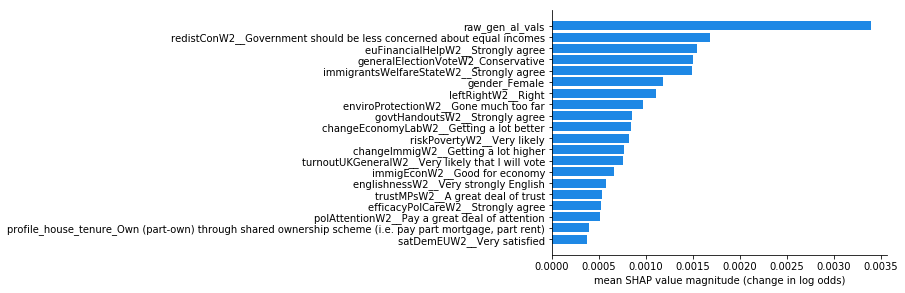

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


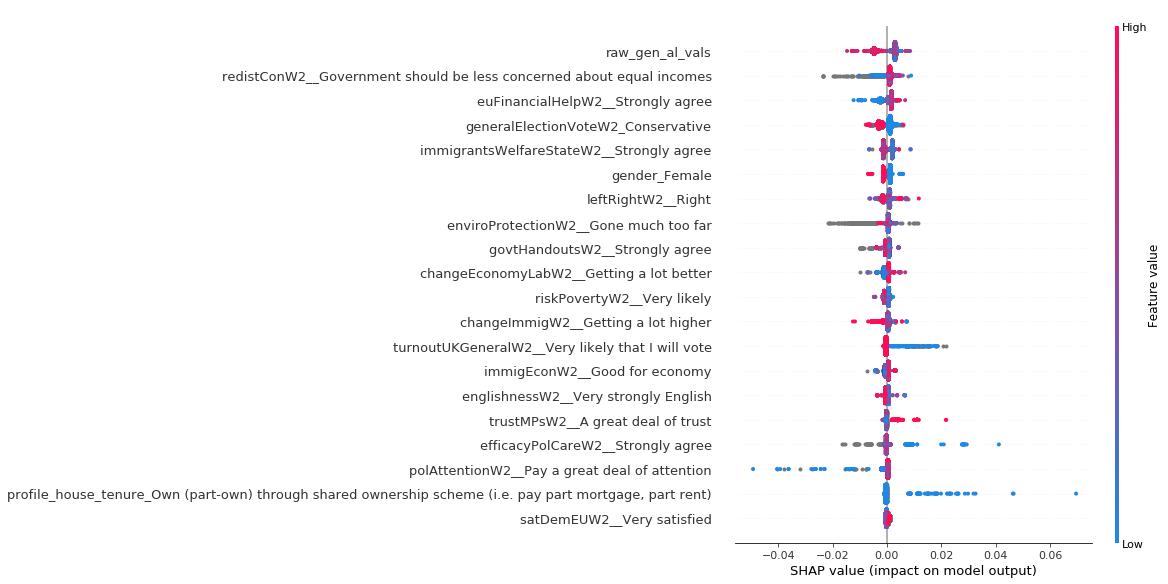

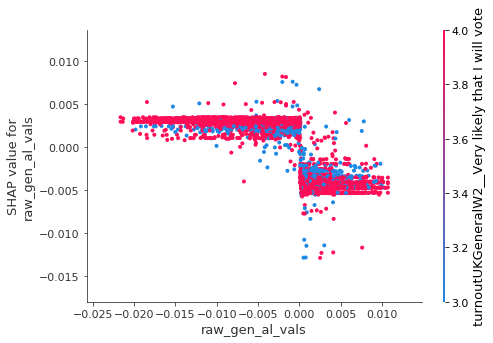

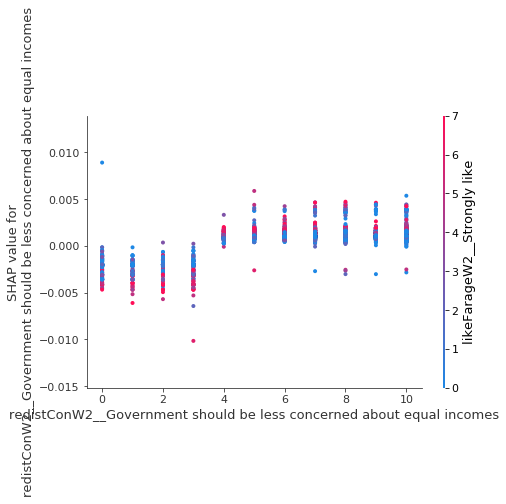

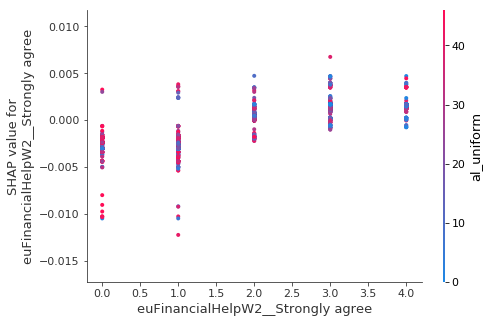

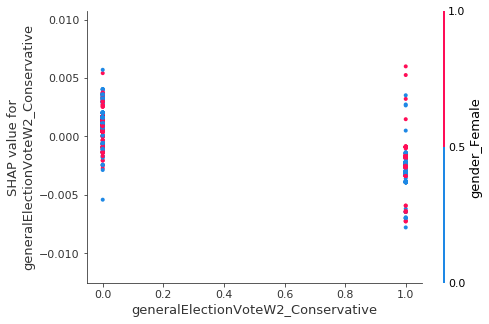

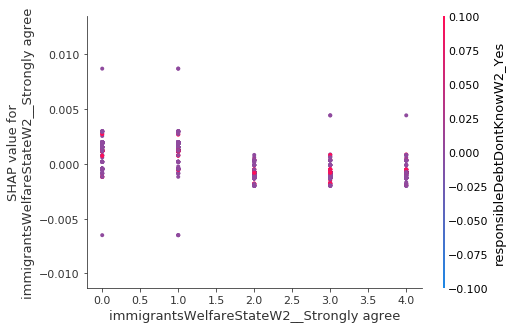

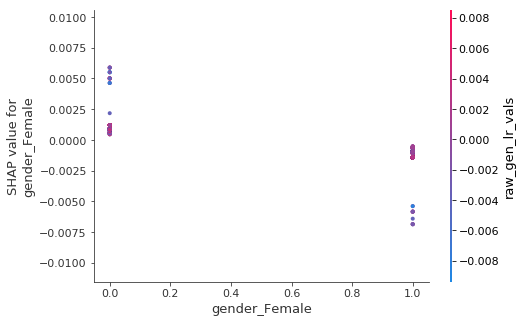

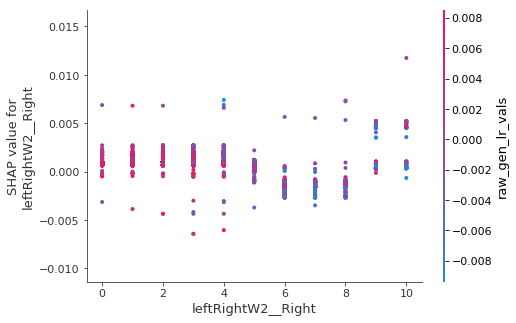

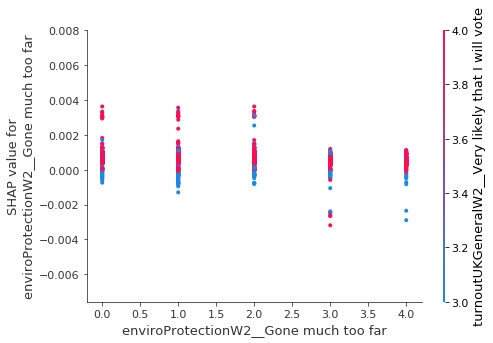

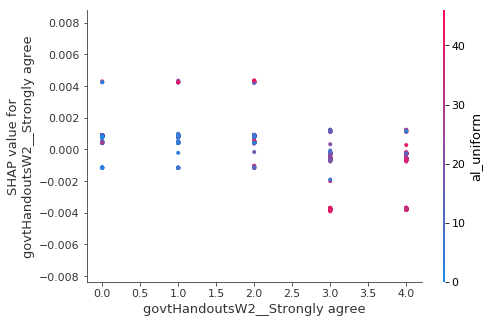

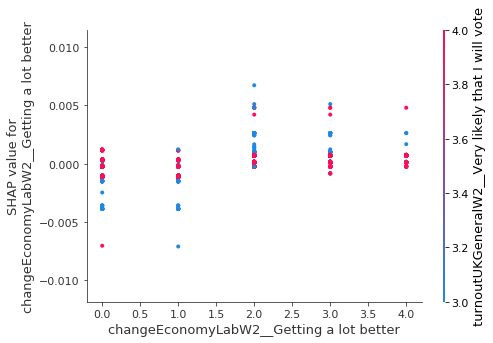

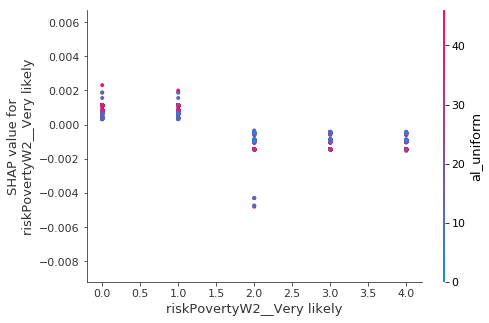

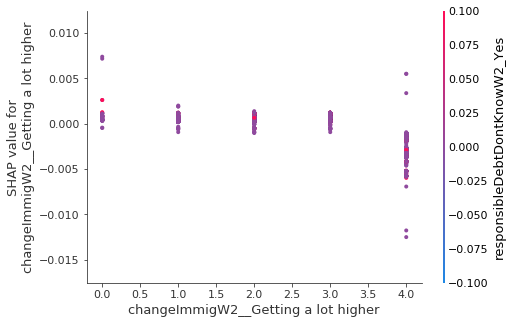

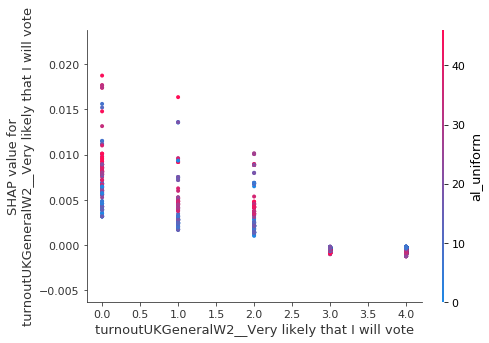

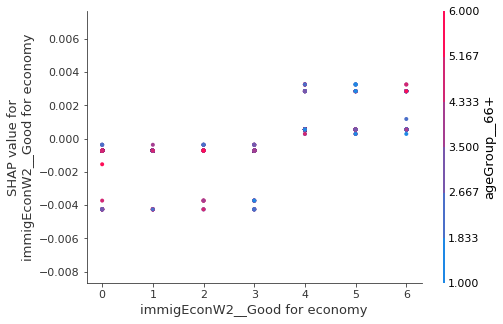

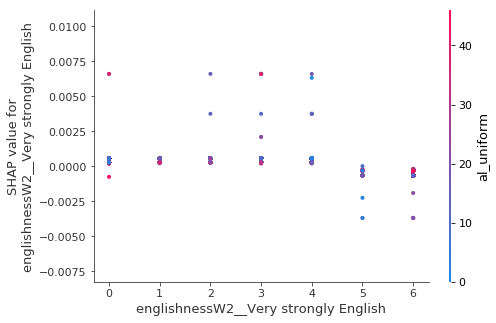

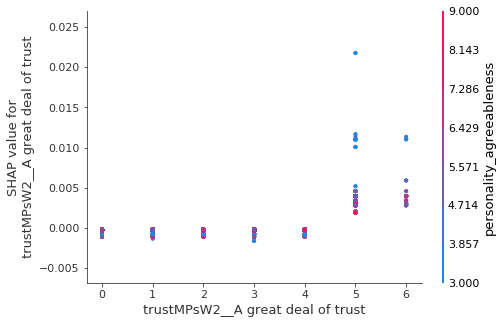

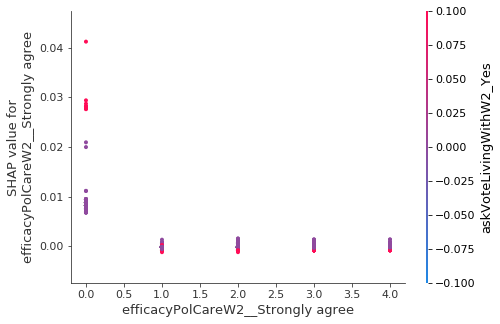

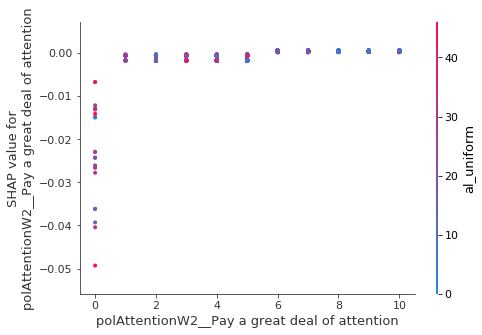

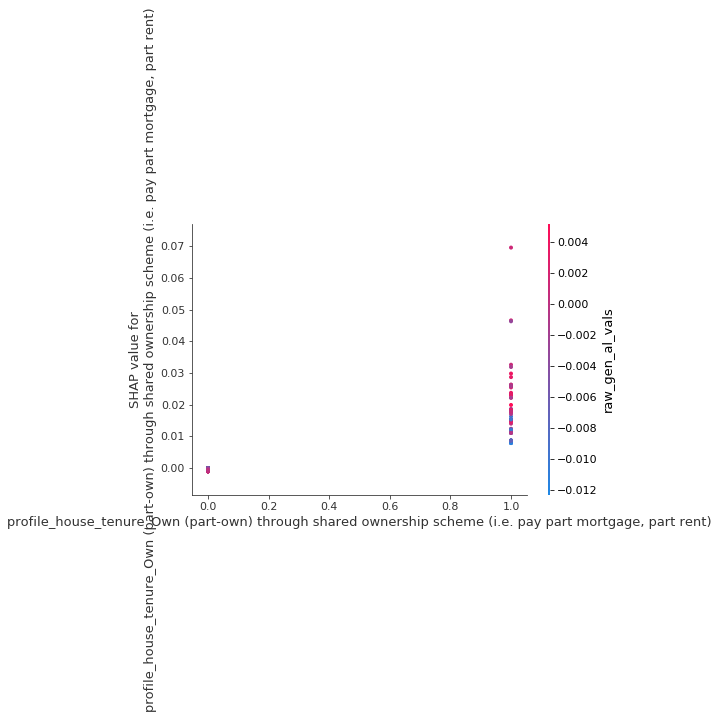

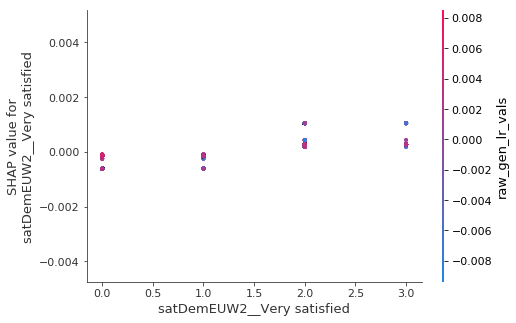

(W2->)euRefVoteW3 3
missing vals in sample weights: 0
[0]	validation_0-rmse:0.512885
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.495523
[2]	validation_0-rmse:0.478919
[3]	validation_0-rmse:0.462967
[4]	validation_0-rmse:0.447765
[5]	validation_0-rmse:0.433246
[6]	validation_0-rmse:0.419375
[7]	validation_0-rmse:0.406361
[8]	validation_0-rmse:0.394062
[9]	validation_0-rmse:0.38224
[10]	validation_0-rmse:0.370905
[11]	validation_0-rmse:0.360087
[12]	validation_0-rmse:0.349858
[13]	validation_0-rmse:0.340242
[14]	validation_0-rmse:0.331207
[15]	validation_0-rmse:0.322576
[16]	validation_0-rmse:0.314393
[17]	validation_0-rmse:0.306665
[18]	validation_0-rmse:0.299394
[19]	validation_0-rmse:0.29251
MSE: 0.09, MAE: 0.26, EV: 0.01, R2: -1.32


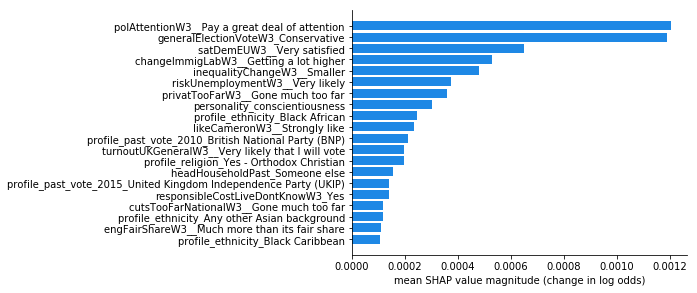

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


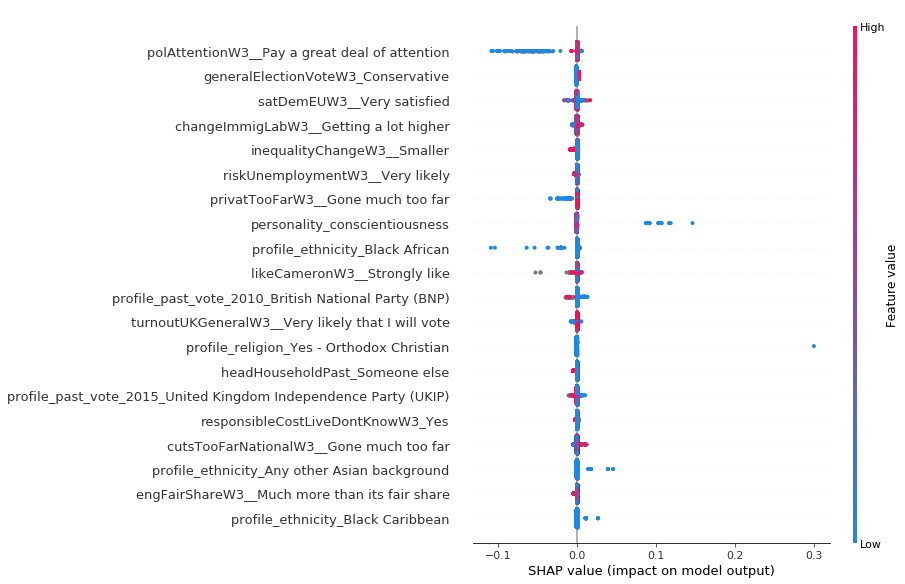

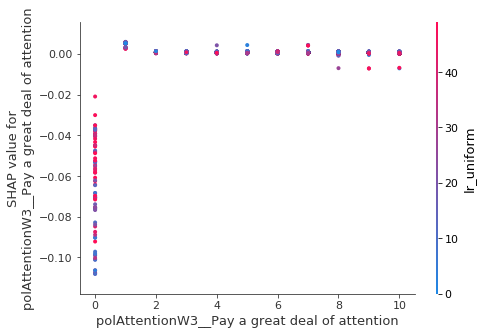

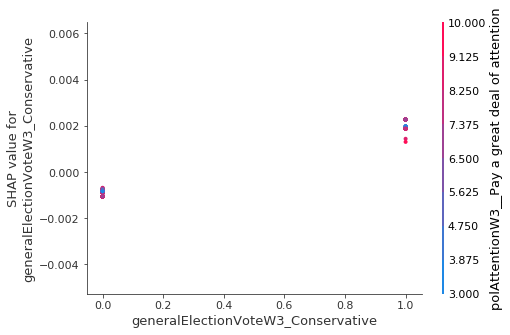

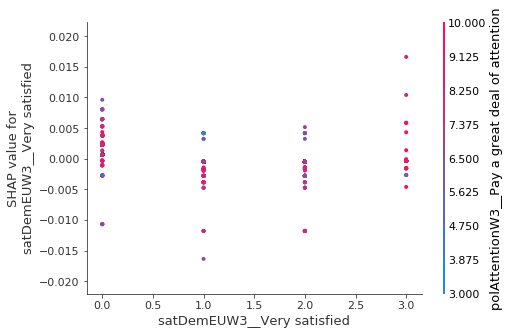

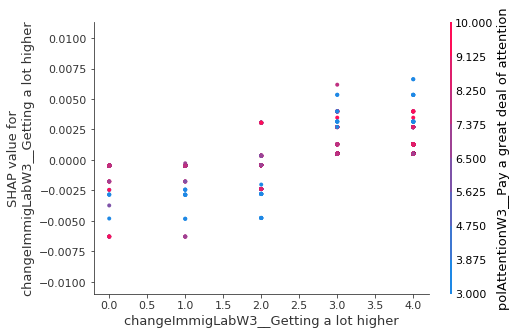

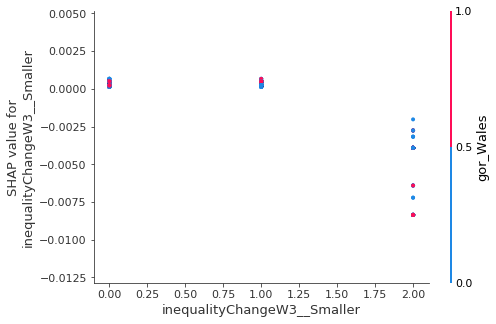

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


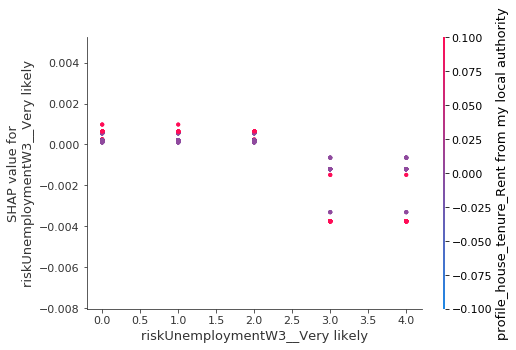

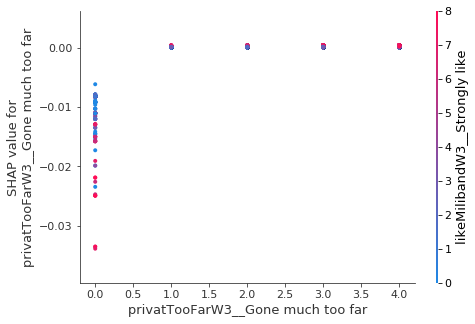

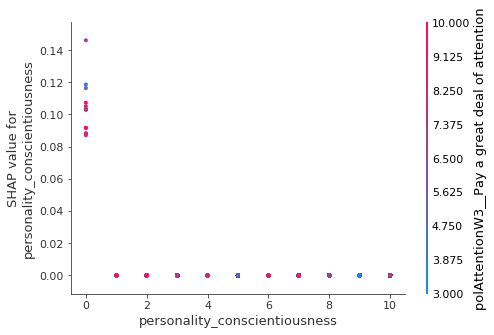

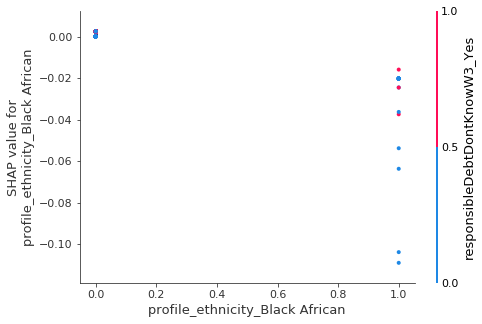

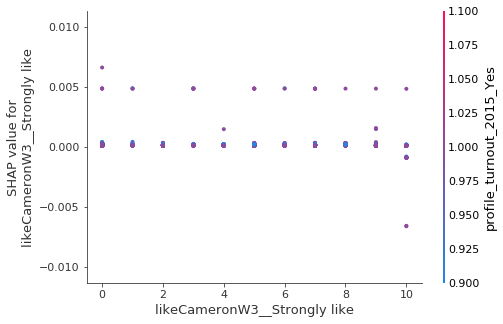

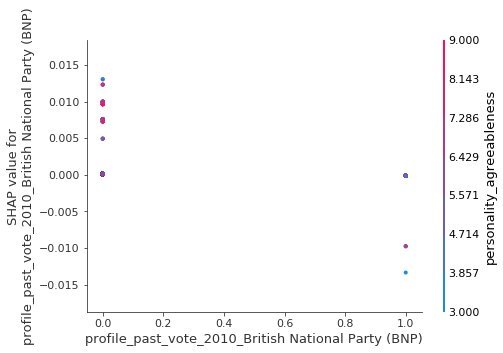

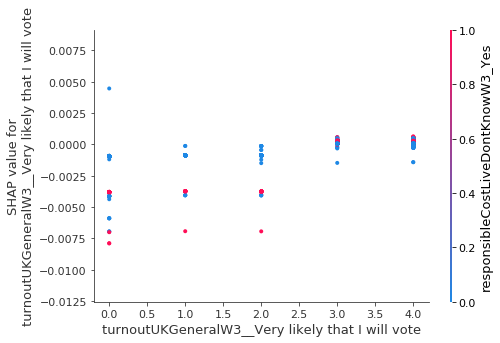

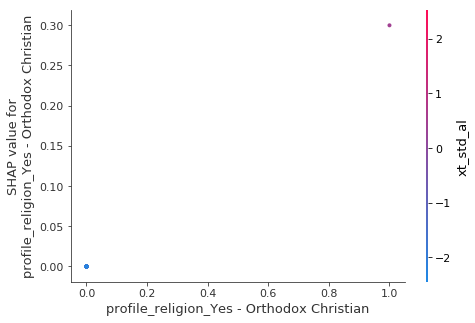

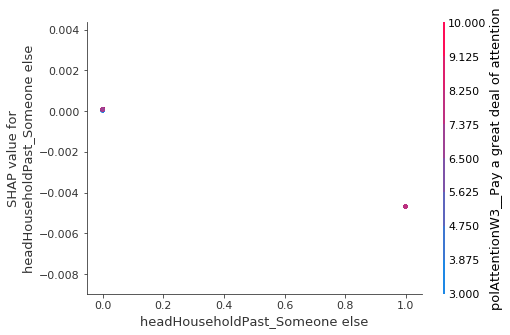

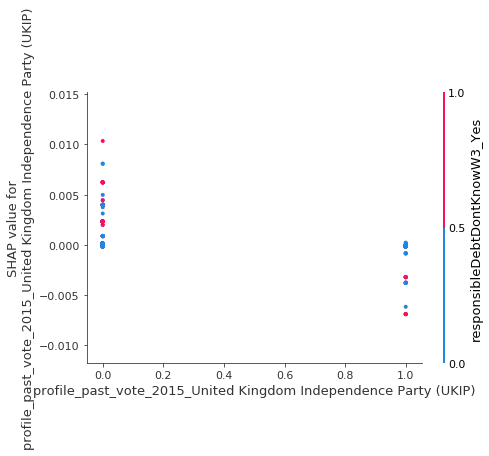

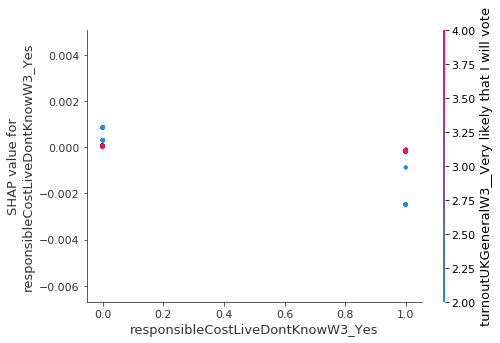

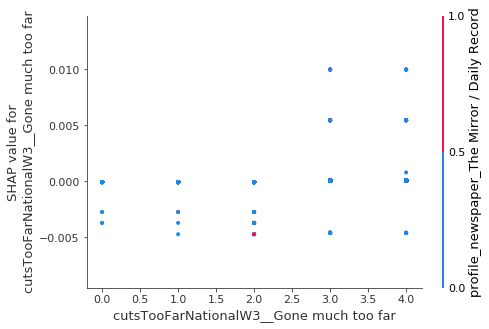

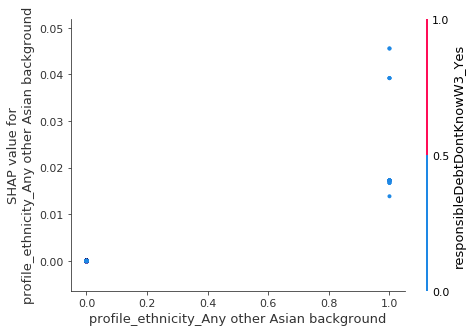

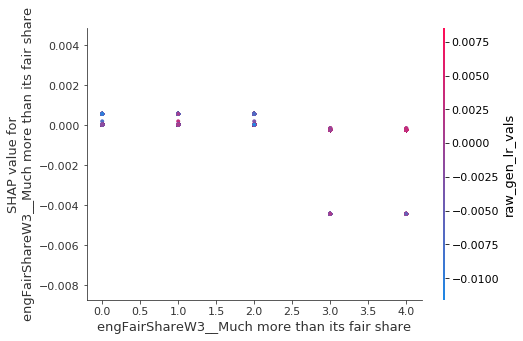

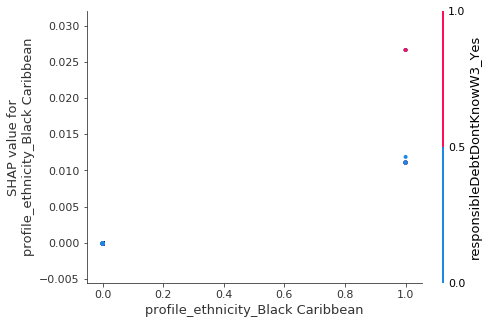

(W3->)euRefVoteW4 4
missing vals in sample weights: 0
[0]	validation_0-rmse:0.524154
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.505674
[2]	validation_0-rmse:0.488003
[3]	validation_0-rmse:0.471057
[4]	validation_0-rmse:0.454899
[5]	validation_0-rmse:0.439602
[6]	validation_0-rmse:0.424911
[7]	validation_0-rmse:0.410868
[8]	validation_0-rmse:0.397603
[9]	validation_0-rmse:0.384898
[10]	validation_0-rmse:0.372709
[11]	validation_0-rmse:0.361253
[12]	validation_0-rmse:0.35024
[13]	validation_0-rmse:0.339791
[14]	validation_0-rmse:0.329933
[15]	validation_0-rmse:0.320327
[16]	validation_0-rmse:0.311532
[17]	validation_0-rmse:0.30311
[18]	validation_0-rmse:0.295238
[19]	validation_0-rmse:0.287692
MSE: 0.08, MAE: 0.25, EV: 0.00, R2: -1.63


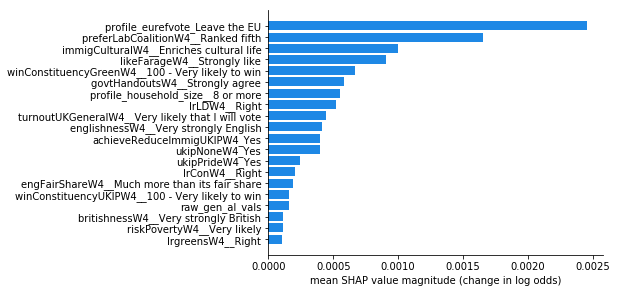

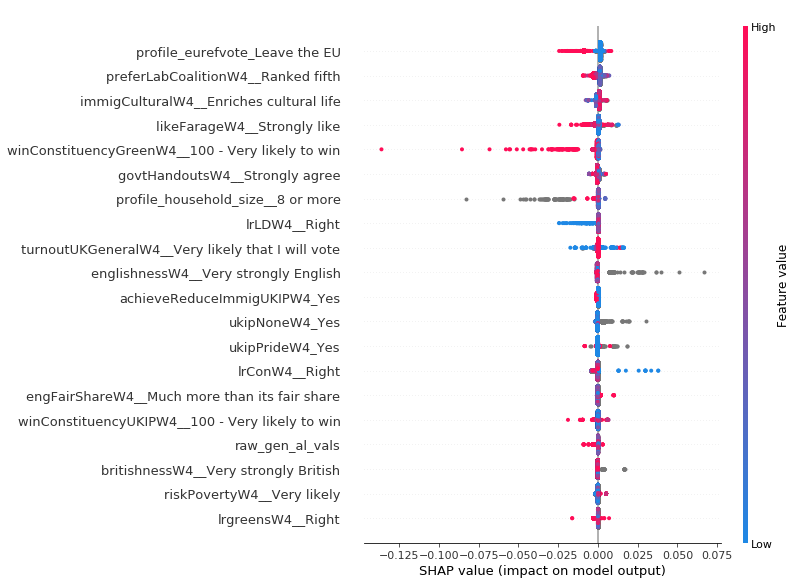

In [ ]:
%%time
# target_var = "immigSelfW10__Allow many more"
# weight_var = 'wt_new_W10'  


# 'wt_new_W10'

#'wt_full_W9'
# track base variable in list
for target_var,base_var in zip(var_list,base_list):
    
#     wave_no = 10
    wave_no = int( re.search( 'W(\d+)$', target_var ).groups()[0] )
    weight_var = num_to_weight[wave_no]
    
    print( target_var, wave_no )
    
#     mask  = immigDiff[target_var].notnull()
#     target = immigDiff[target_var][mask]
#     mask = immigDiff[diff_list ].notnull().all(axis=1)
    mask = immigDiff[target_var].notnull()
    base = BES_reduced_with_na[base_var]
#     base_var = base_var +1
#     mask = mask & (base >= base.quantile(0.25)) & (base <=base.quantile(0.75))    
    mask = mask & (base <=base.quantile(0.5))
    target = immigDiff[target_var][mask]
#     target = immigDiff[diff_list ].mean(axis=1)[mask]
    
    
    train  = BES_reduced_with_na[mask].copy()
    train = pd.concat([train,immigDiff[mask]],axis=1)
#     train  = train.drop(target_var, axis=1)    
    
#     mask   = changeImmigCultural.notnull()    
#     target = changeImmigCultural[mask]
    
#     train  = train.drop(target_var, axis=1)
    

    
#     mask   = BES_reduced_with_na[target_var].notnull()
#    target = BES_reduced_with_na[target_var][mask]
#     mask   = train[target_var].notnull()
    
    
    # remove zero variance columns
    train  = train.drop(train.columns[train.var()==0], axis=1)
    
    # add pan_dataset_values columns
    train  = pd.concat([train,pan_dataset_values.drop('id',axis=1)[mask]],axis=1)
    train  = train.drop("genImmigSentiment", axis=1)
    
    # drop variables that definitely involve *some* downsteam component - e.g. target is W4, predictor is W6
    
    other_waves = "("+"|".join([num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]) +")" +"([^0-9]|$)"
    train = train.drop( [x for x in train.columns if re.search(other_waves,x)] , axis=1 )   
    
#     for future_wave in [num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]:
#         train = train.drop([x for x in train.columns if re.search(future_wave+"[^0-9]",x)], axis=1)
#     train = train.drop([x for x in train.columns if ("W10" in x)|("W11" in x)|("W12" in x)|("W13" in x)], axis=1)

    for var_stub in var_stub_list:
        train = train.drop([x for x in train.columns if var_stub in x], axis=1)
    
#     train = train.drop([x for x in train.columns if "immigCultural" in x], axis=1)      
#     train = train.drop([x for x in train.columns if "euRefVote" in x], axis=1)    


    sample_weights = BES_Panel[weight_var][mask]
    print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
    sample_weights = sample_weights.fillna(sample_weights.median())

    output_subfolder = BES_output_folder + "xgboost_test" + os.sep + target_var.replace(">","") + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )


    ############################

    alg = XGBRegressor(
     learning_rate =0.04,
     n_estimators= 20,
     max_depth=3,
     min_child_weight=1,
     gamma=0,
     subsample=0.75,
     colsample_bytree=0.9,
     colsample_bylevel=.85,
     objective= 'reg:linear',
     scale_pos_weight=1.0,
     reg_alpha=0,
     reg_lambda=1,
     njobs=3,
     seed=27)

    # split data into train and test sets
    # fit, validate and find overfitting limit
    seed = 7
    test_size = 0.33

    X_train, X_test, y_train, y_test = train_test_split(pd.concat([train,sample_weights],axis=1), target, test_size=test_size,
                                                        random_state=seed, stratify=round(target))



    eval_set = [(X_test, y_test)]

    sample_weight = X_train[weight_var].values
    sample_weight_eval_set = X_test[weight_var].values
    X_train.drop(weight_var, axis=1, inplace=True)
    X_test.drop(weight_var, axis=1, inplace=True)

    alg.fit(X_train, y_train, eval_metric='rmse', 
            early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
            verbose=True, sample_weight= sample_weight)

    # make predictions for test data
    predictions = alg.predict(X_test)

    # evaluate predictions
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    EV = explained_variance_score(y_test, predictions)
    R2 = r2_score(y_test, predictions)

    print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
    alg.set_params(n_estimators=alg.best_iteration)

    ####################################
    # fit to full dataset at non-overfitting level
    alg.fit(train, target, verbose=True, sample_weight= sample_weights)




    shap_values = shap.TreeExplainer(alg).shap_values(train);


    #################################
    threshold = .1
    min_features = 20
    global_shap_vals = np.abs(shap_values).mean(0)[:-1]
    n_top_features = sum(global_shap_vals[np.argsort(global_shap_vals)]>=threshold)
    if n_top_features <min_features:
        n_top_features = min_features



    ##########################

    inds = np.argsort(global_shap_vals)[-n_top_features:]

    y_pos = np.arange(n_top_features)
    plt.figure(figsize=(16,10))
    plt.barh(y_pos, global_shap_vals[inds], color="#1E88E5")
    plt.yticks(y_pos, train.columns[inds])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("mean SHAP value magnitude (change in log odds)")
    plt.gcf().set_size_inches(6, 4.5)

    plt.savefig(output_subfolder + "mean_impact" + ".png", bbox_inches='tight')

    plt.show()

    ####################
    fig = plt.figure()
    shap.summary_plot(shap_values, train, max_display=n_top_features, plot_type='dot');
    fig.savefig(output_subfolder + "summary_plot" + ".png", bbox_inches='tight')



    ##################
    count = 0
    for name in train.columns[inds[::-1]]:
        fig = plt.figure(figsize = (16,10))    
        shap.dependence_plot(name, shap_values, train)
        fig.savefig(output_subfolder + "featureNo "+str(count) + " " + name.replace("/","_") + ".png", bbox_inches='tight')
        count = count + 1